## Imports and Function declarations

In [726]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve,
    auc,
    classification_report,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [727]:
def plotROC(clf, XTest, QTest, probs=True):
    if (probs == True):
        probs = clf.predict_proba(XTest)
        preds = probs[:,1]
    else:
        preds = clf.decision_function(XTest)
    
    fpr, tpr, threshold = roc_curve(QTest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [728]:
def discreteAlcohol(df):
    df["alcohol_cat"] = 'L'
    mean = df["alcohol"].mean()
    stddev = df["alcohol"].std()
    for index, series in df.iterrows():
        alcohol = series["alcohol"]
        if alcohol < (mean-stddev):
            df.loc[index, "alcohol_cat"] = 'L'
        elif alcohol > (mean+stddev):
            df.loc[index, "alcohol_cat"] = 'H'
        else:
            df.loc[index, "alcohol_cat"] = 'M'

In [729]:
def discreteSugar(df):
    df["isSweet"] = 0
    threshold = df["residual sugar"].median()

    for index, series in df.iterrows():
        sugar = series["residual sugar"]
        if sugar < threshold:
            df.loc[index, "isSweet"] = 0
        else:
            df.loc[index, "isSweet"] = 1

In [730]:
path = 'https://raw.githubusercontent.com/Jonezy11/CSC2034/master/data/'
data_w = pd.read_csv(path + "winequality-white.csv", header=0, sep=';')
data_r = pd.read_csv(path + "winequality-red.csv", header=0, sep=';')

## Initial Exploration of Datasets

### Quality Distribution

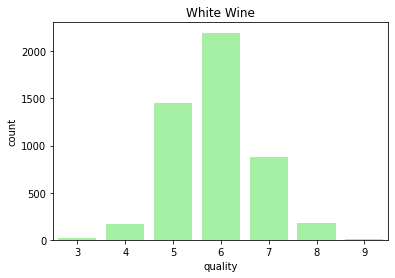

In [731]:
g = sns.countplot(data=data_w, x="quality", color='palegreen').set(title = "White Wine")

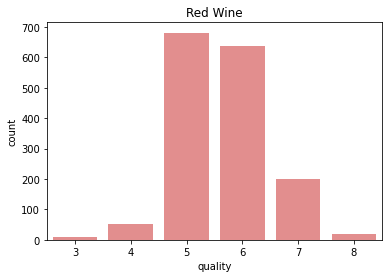

In [732]:
g = sns.countplot(data=data_r, x="quality", color='lightcoral').set(title = "Red Wine")

### Discretising Alcohol Content

In [733]:
discreteAlcohol(data_w)
discreteAlcohol(data_r)

### Quality Distribution against Alcohol Content

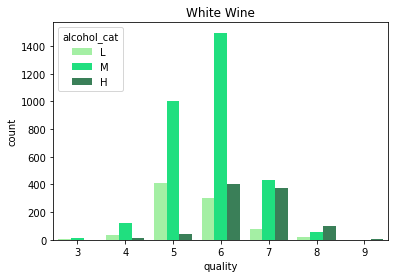

In [734]:
g = sns.countplot(data=data_w, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"palegreen",'M':"springgreen",'H':"seagreen"}).set(title = "White Wine")

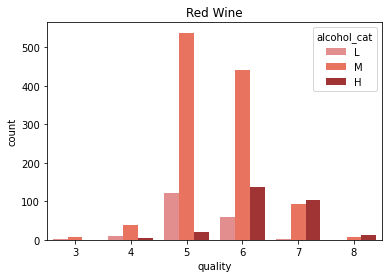

In [735]:
g = sns.countplot(data=data_r, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"lightcoral",'M':"tomato",'H':"firebrick"}).set(title = "Red Wine")

### Residual Sugar Analysis

#### White Wine

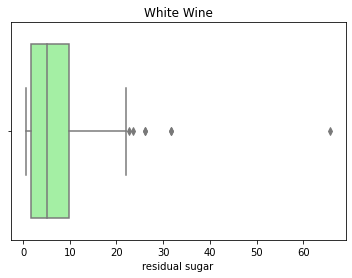

In [736]:
g = sns.boxplot(data=data_w, x='residual sugar', color='palegreen').set(title = "White Wine")

Discretising sugar content

In [737]:
discreteSugar(data_w)

Dataset is evenly split

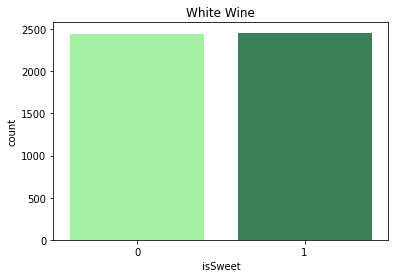

In [738]:
g = sns.countplot(data=data_w, x="isSweet", palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

In [739]:
data_w["isSweet"].value_counts()

1    2458
0    2440
Name: isSweet, dtype: int64

#### Red Wine

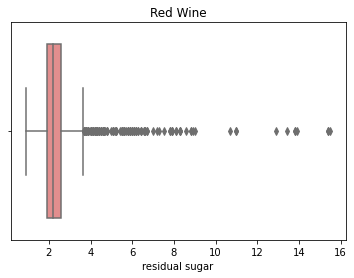

In [740]:
g = sns.boxplot(data=data_r, x='residual sugar', color='lightcoral').set(title = "Red Wine")

Discretising sugar content

In [741]:
discreteSugar(data_r)

Dataset is evenly split

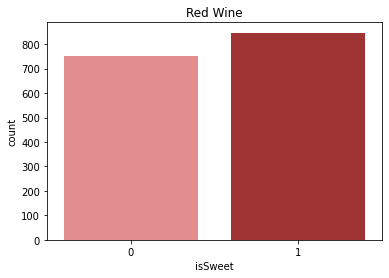

In [742]:
g = sns.countplot(data=data_r, x="isSweet", palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

In [743]:
data_r["isSweet"].value_counts()

1    847
0    752
Name: isSweet, dtype: int64

### Quality Distribution against Residual Sugar

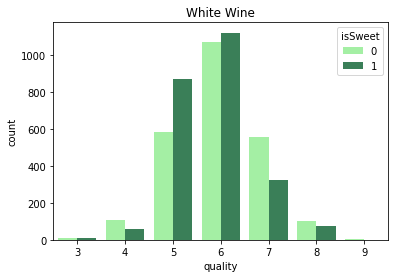

In [744]:
g = sns.countplot(data=data_w, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

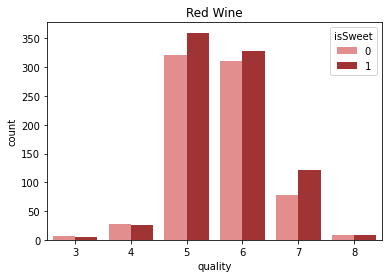

In [745]:
g = sns.countplot(data=data_r, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

## Variable Correlations

### White Wine

#### Scatter Plots with Regression Lines

##### [Fixed Acidity]

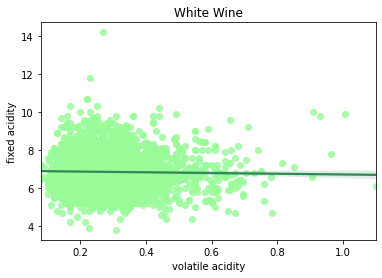

In [469]:
g = sns.regplot(data=data_w, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

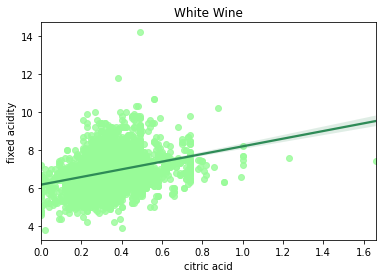

In [470]:
g = sns.regplot(data=data_w, x="citric acid", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

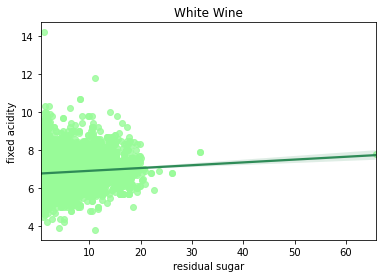

In [471]:
g = sns.regplot(data=data_w, x="residual sugar", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

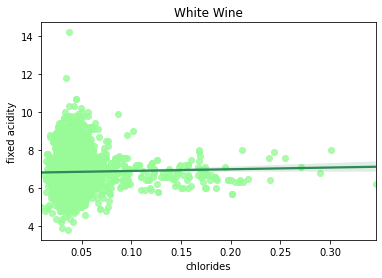

In [472]:
g = sns.regplot(data=data_w, x="chlorides", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

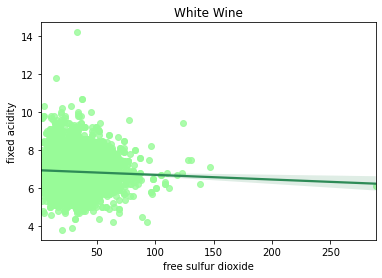

In [473]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

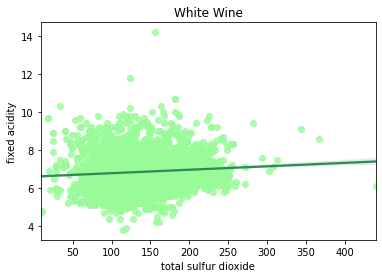

In [474]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

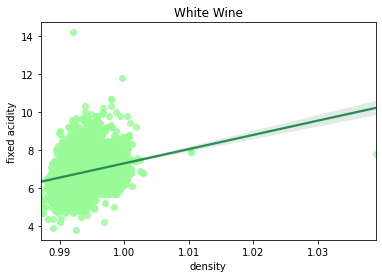

In [475]:
g = sns.regplot(data=data_w, x="density", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

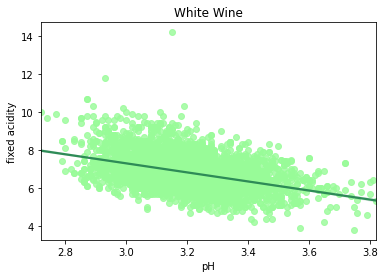

In [476]:
g = sns.regplot(data=data_w, x="pH", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

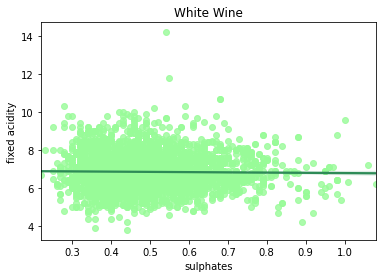

In [477]:
g = sns.regplot(data=data_w, x="sulphates", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

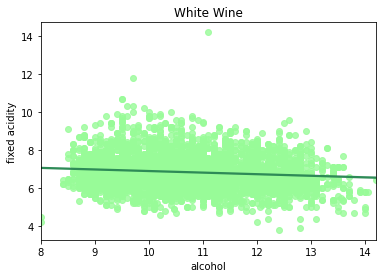

In [478]:
g = sns.regplot(data=data_w, x="alcohol", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Volatile Acidity]

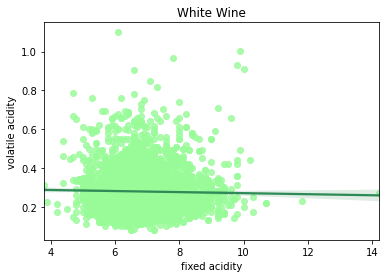

In [479]:
g = sns.regplot(data=data_w, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

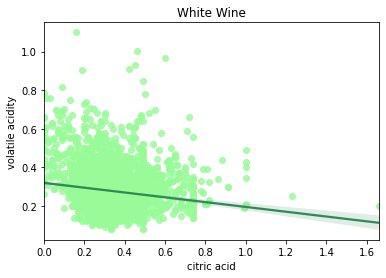

In [480]:
g = sns.regplot(data=data_w, x="citric acid", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

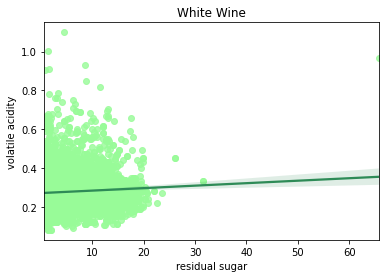

In [481]:
g = sns.regplot(data=data_w, x="residual sugar", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

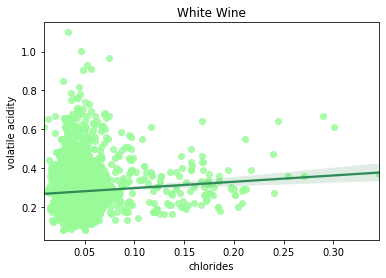

In [482]:
g = sns.regplot(data=data_w, x="chlorides", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

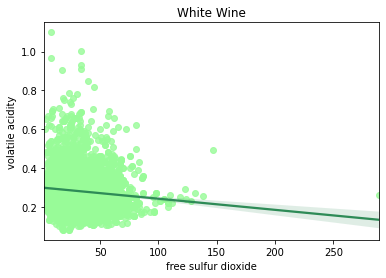

In [483]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

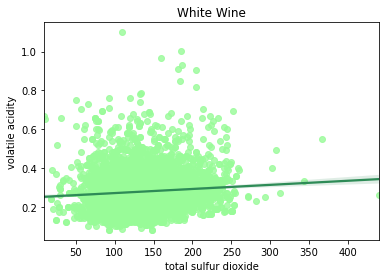

In [484]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

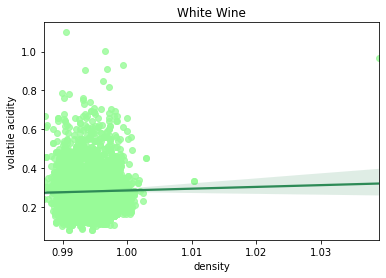

In [485]:
g = sns.regplot(data=data_w, x="density", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

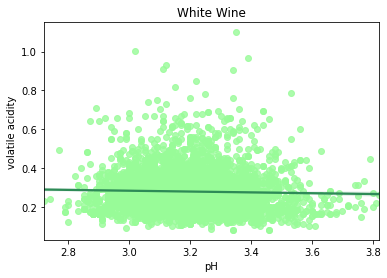

In [486]:
g = sns.regplot(data=data_w, x="pH", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

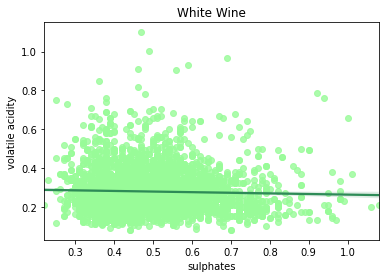

In [487]:
g = sns.regplot(data=data_w, x="sulphates", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

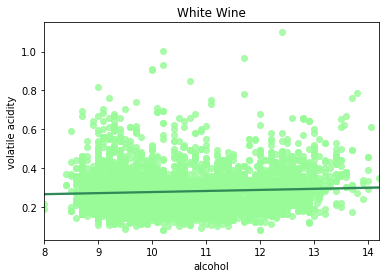

In [488]:
g = sns.regplot(data=data_w, x="alcohol", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Citric Acid]

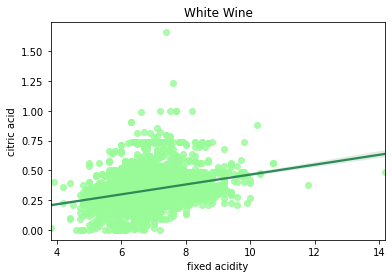

In [489]:
g = sns.regplot(data=data_w, x="fixed acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

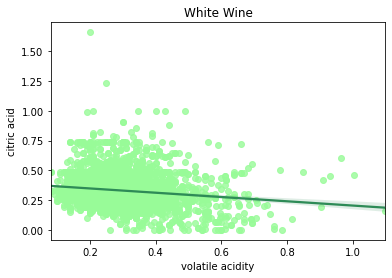

In [490]:
g = sns.regplot(data=data_w, x="volatile acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

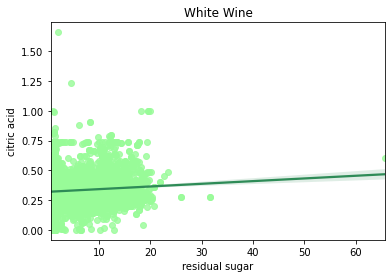

In [491]:
g = sns.regplot(data=data_w, x="residual sugar", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

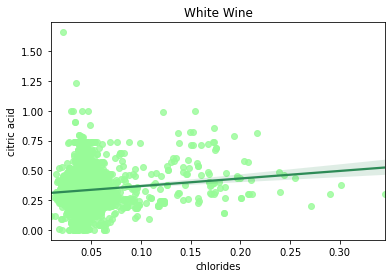

In [492]:
g = sns.regplot(data=data_w, x="chlorides", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

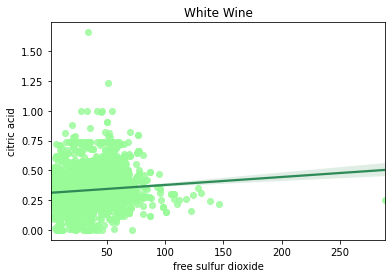

In [493]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

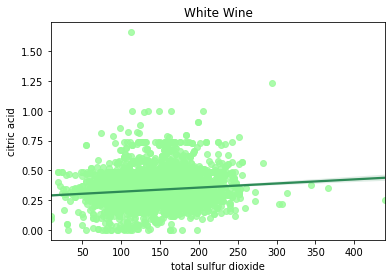

In [494]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

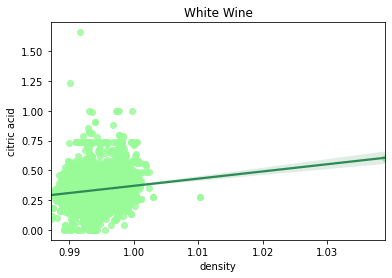

In [495]:
g = sns.regplot(data=data_w, x="density", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

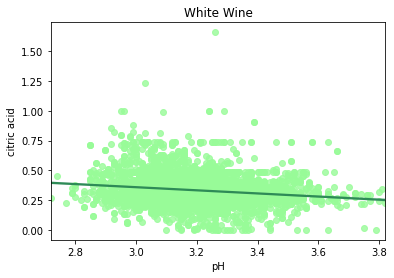

In [496]:
g = sns.regplot(data=data_w, x="pH", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

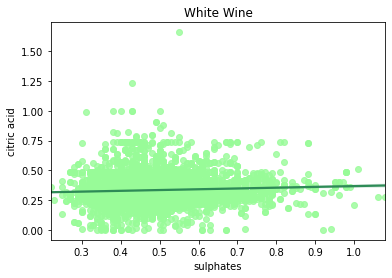

In [497]:
g = sns.regplot(data=data_w, x="sulphates", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

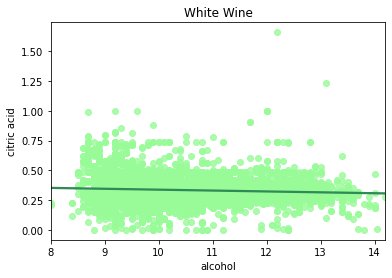

In [498]:
g = sns.regplot(data=data_w, x="alcohol", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Residual Sugar]

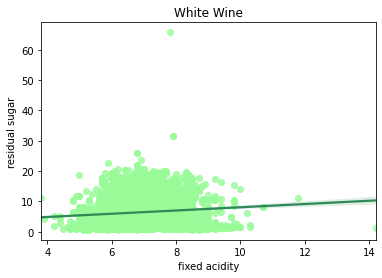

In [499]:
g = sns.regplot(data=data_w, x="fixed acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

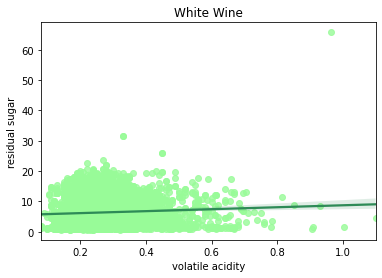

In [500]:
g = sns.regplot(data=data_w, x="volatile acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

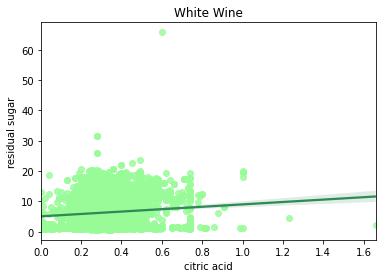

In [501]:
g = sns.regplot(data=data_w, x="citric acid", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

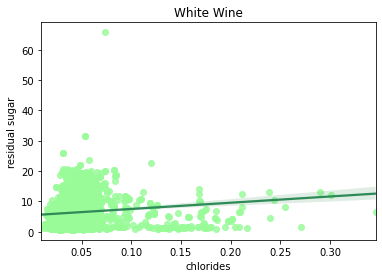

In [502]:
g = sns.regplot(data=data_w, x="chlorides", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

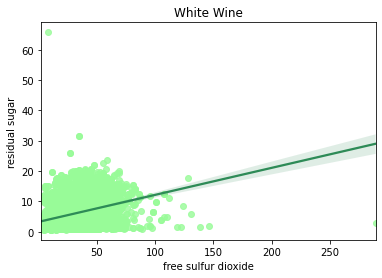

In [503]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

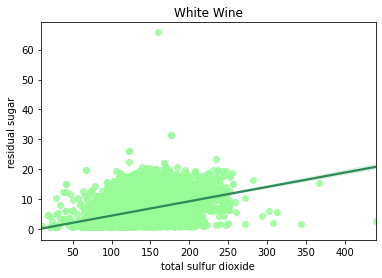

In [504]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

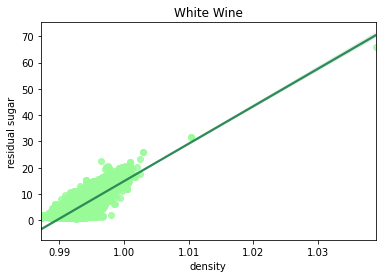

In [505]:
g = sns.regplot(data=data_w, x="density", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

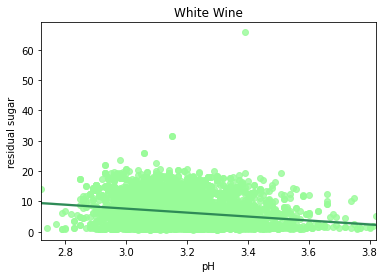

In [506]:
g = sns.regplot(data=data_w, x="pH", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

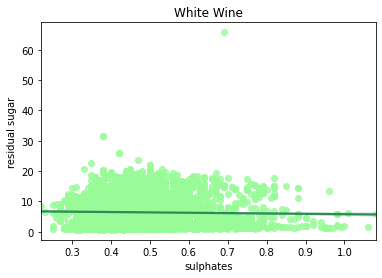

In [507]:
g = sns.regplot(data=data_w, x="sulphates", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

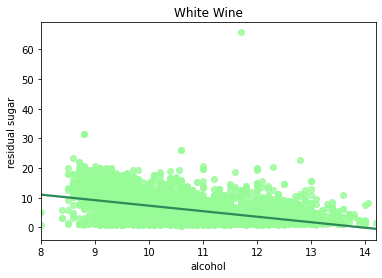

In [508]:
g = sns.regplot(data=data_w, x="alcohol", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Chlorides]

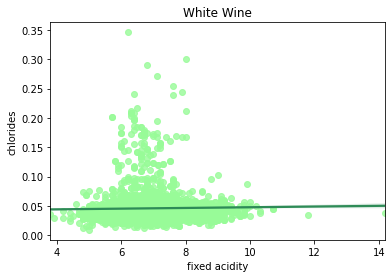

In [509]:
g = sns.regplot(data=data_w, x="fixed acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

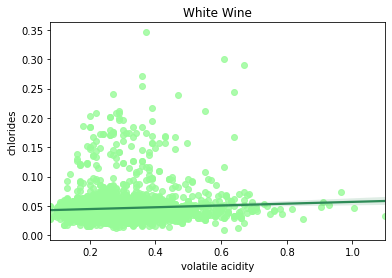

In [510]:
g = sns.regplot(data=data_w, x="volatile acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

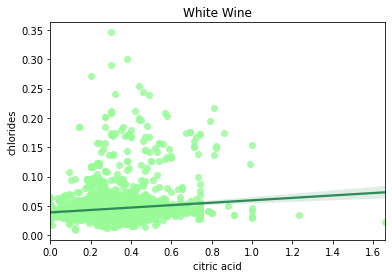

In [511]:
g = sns.regplot(data=data_w, x="citric acid", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

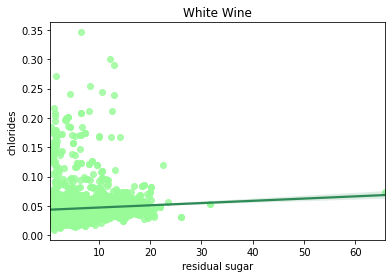

In [512]:
g = sns.regplot(data=data_w, x="residual sugar", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

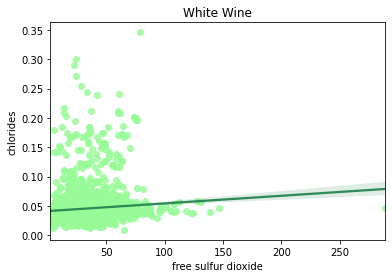

In [513]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

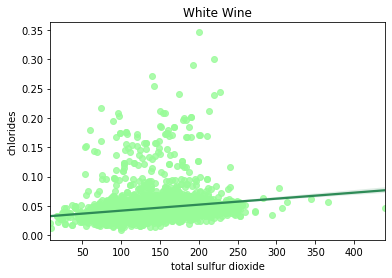

In [514]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

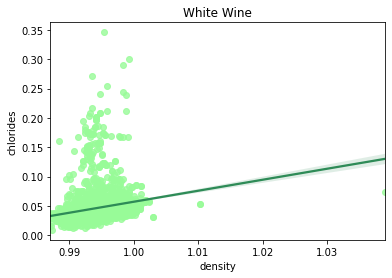

In [515]:
g = sns.regplot(data=data_w, x="density", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

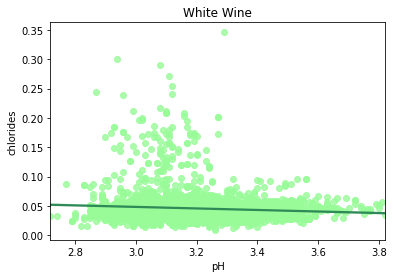

In [516]:
g = sns.regplot(data=data_w, x="pH", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

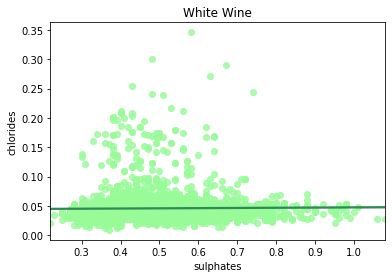

In [517]:
g = sns.regplot(data=data_w, x="sulphates", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

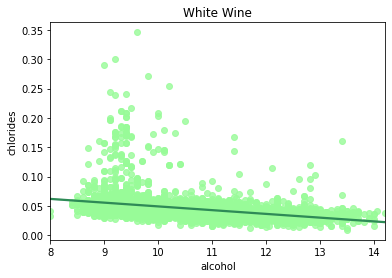

In [518]:
g = sns.regplot(data=data_w, x="alcohol", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Free Sulfur Dioxide]

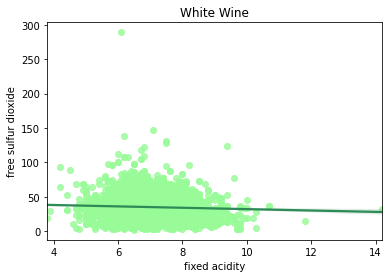

In [519]:
g = sns.regplot(data=data_w, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

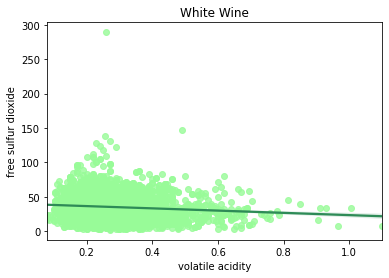

In [520]:
g = sns.regplot(data=data_w, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

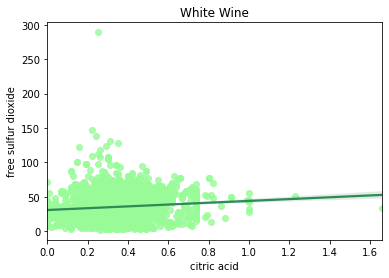

In [521]:
g = sns.regplot(data=data_w, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

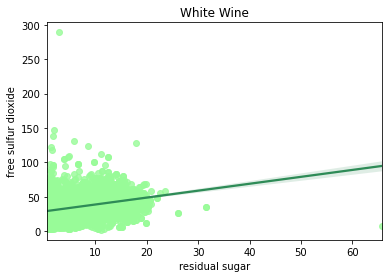

In [522]:
g = sns.regplot(data=data_w, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

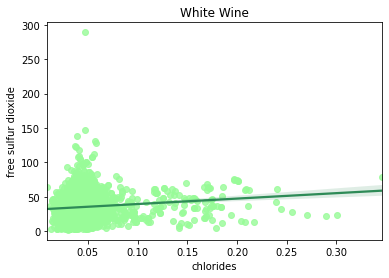

In [523]:
g = sns.regplot(data=data_w, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

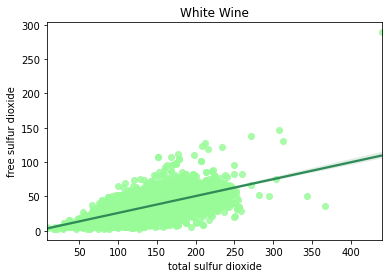

In [524]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

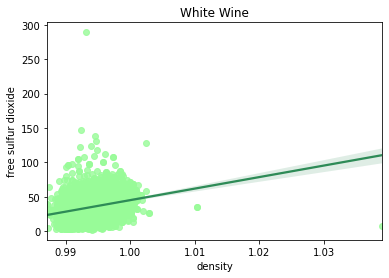

In [525]:
g = sns.regplot(data=data_w, x="density", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

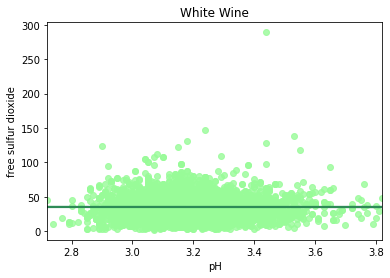

In [526]:
g = sns.regplot(data=data_w, x="pH", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

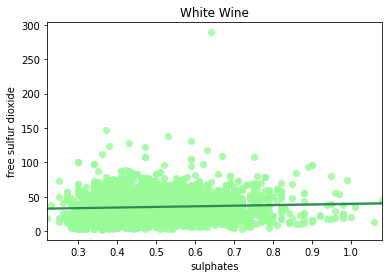

In [527]:
g = sns.regplot(data=data_w, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

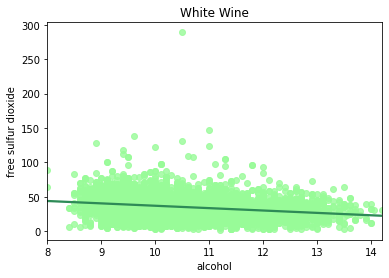

In [528]:
g = sns.regplot(data=data_w, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Total Sulfur Dioxide]

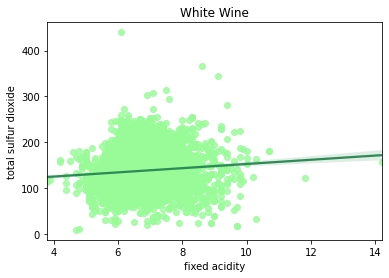

In [529]:
g = sns.regplot(data=data_w, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

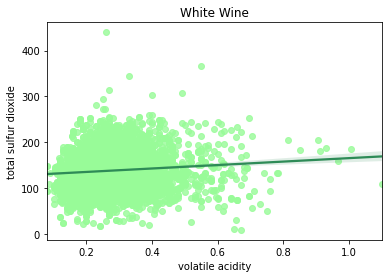

In [530]:
g = sns.regplot(data=data_w, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

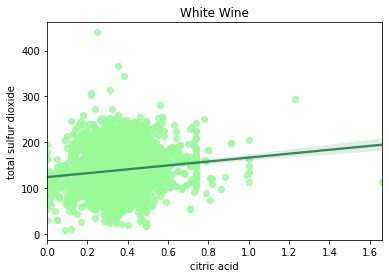

In [531]:
g = sns.regplot(data=data_w, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

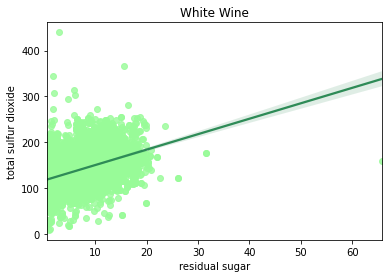

In [532]:
g = sns.regplot(data=data_w, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

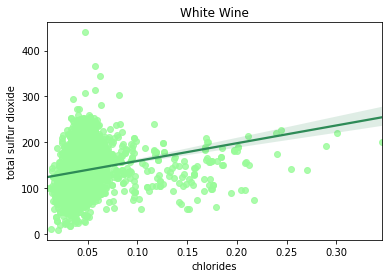

In [533]:
g = sns.regplot(data=data_w, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

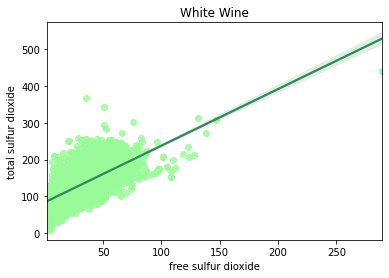

In [534]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

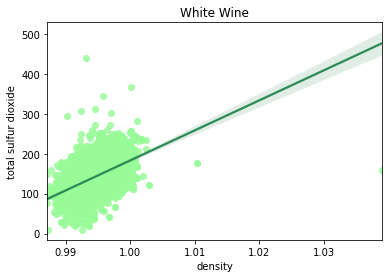

In [535]:
g = sns.regplot(data=data_w, x="density", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

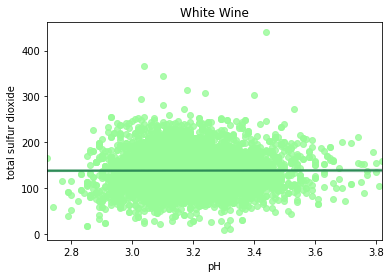

In [536]:
g = sns.regplot(data=data_w, x="pH", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

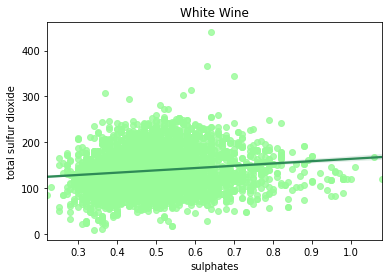

In [537]:
g = sns.regplot(data=data_w, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

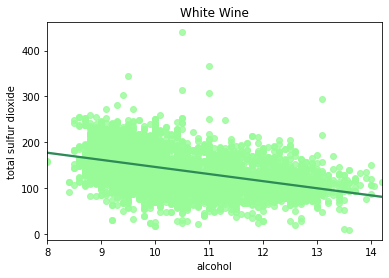

In [538]:
g = sns.regplot(data=data_w, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Density]

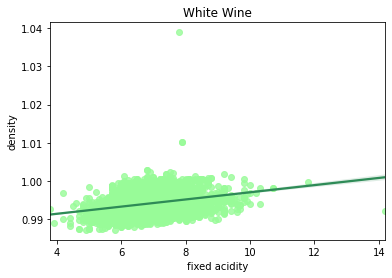

In [539]:
g = sns.regplot(data=data_w, x="fixed acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

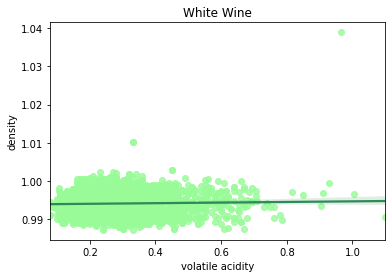

In [540]:
g = sns.regplot(data=data_w, x="volatile acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

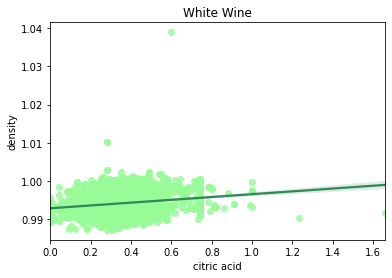

In [541]:
g = sns.regplot(data=data_w, x="citric acid", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

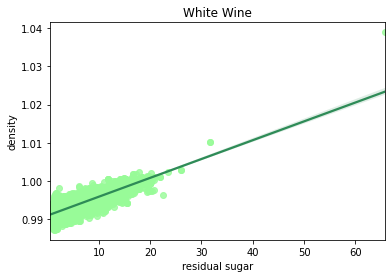

In [542]:
g = sns.regplot(data=data_w, x="residual sugar", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

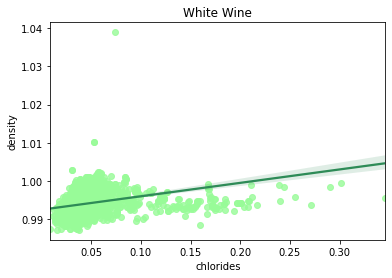

In [543]:
g = sns.regplot(data=data_w, x="chlorides", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

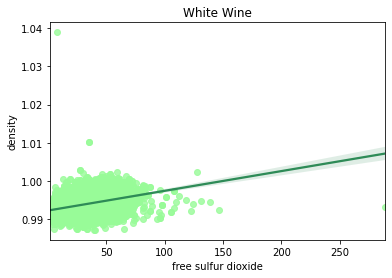

In [544]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

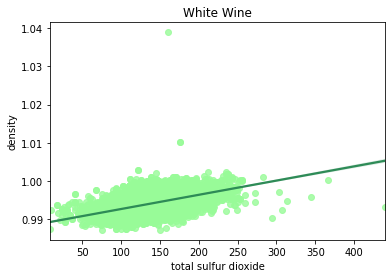

In [545]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

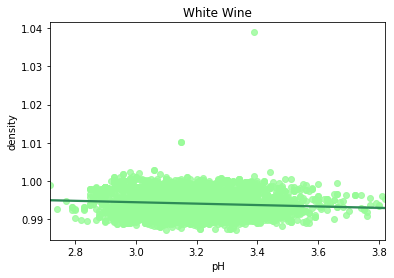

In [546]:
g = sns.regplot(data=data_w, x="pH", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

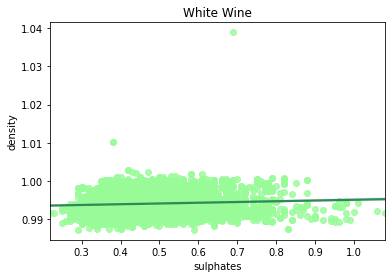

In [547]:
g = sns.regplot(data=data_w, x="sulphates", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

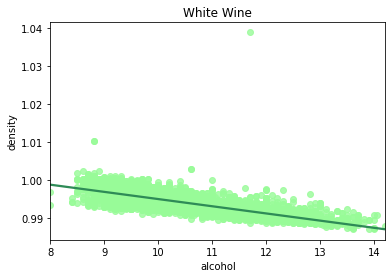

In [548]:
g = sns.regplot(data=data_w, x="alcohol", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [pH]

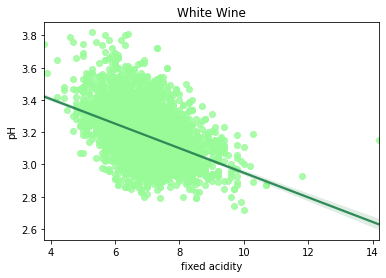

In [549]:
g = sns.regplot(data=data_w, x="fixed acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

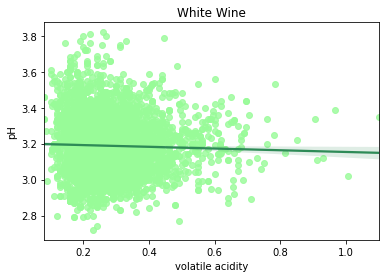

In [550]:
g = sns.regplot(data=data_w, x="volatile acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

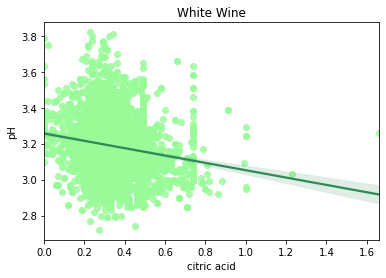

In [551]:
g = sns.regplot(data=data_w, x="citric acid", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

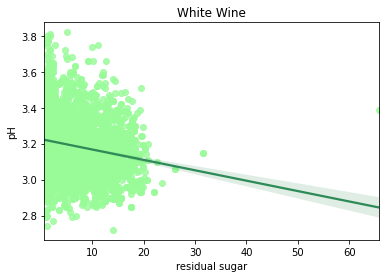

In [552]:
g = sns.regplot(data=data_w, x="residual sugar", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

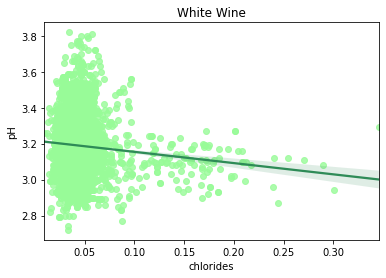

In [553]:
g = sns.regplot(data=data_w, x="chlorides", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

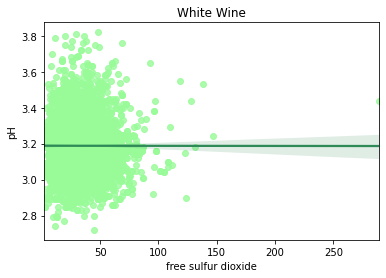

In [554]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

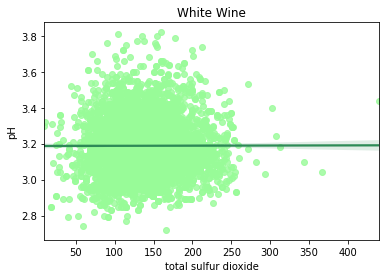

In [555]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

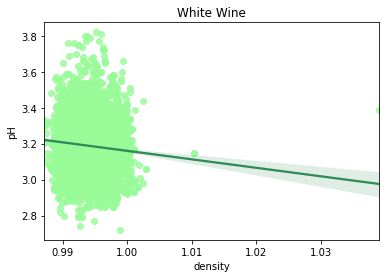

In [556]:
g = sns.regplot(data=data_w, x="density", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

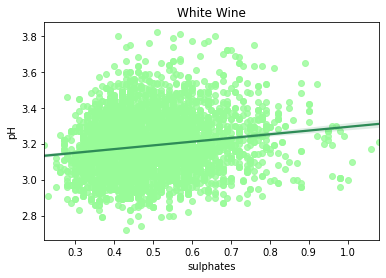

In [557]:
g = sns.regplot(data=data_w, x="sulphates", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

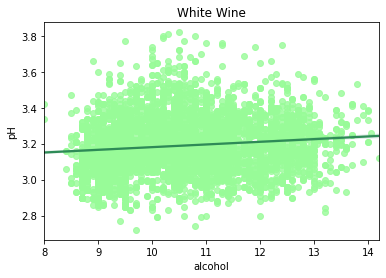

In [558]:
g = sns.regplot(data=data_w, x="alcohol", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Sulphates]

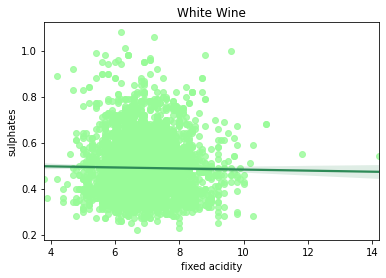

In [559]:
g = sns.regplot(data=data_w, x="fixed acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

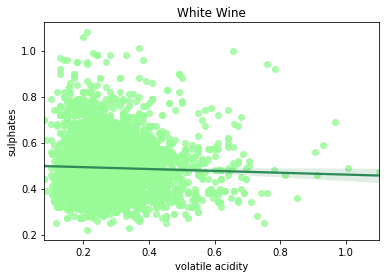

In [560]:
g = sns.regplot(data=data_w, x="volatile acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

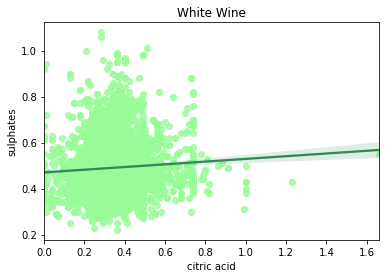

In [561]:
g = sns.regplot(data=data_w, x="citric acid", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

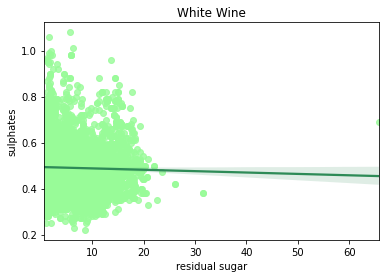

In [562]:
g = sns.regplot(data=data_w, x="residual sugar", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

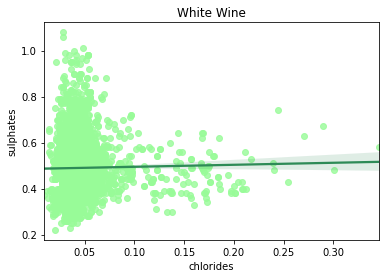

In [563]:
g = sns.regplot(data=data_w, x="chlorides", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

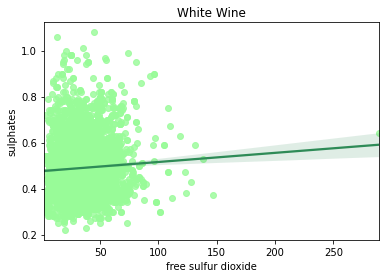

In [564]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

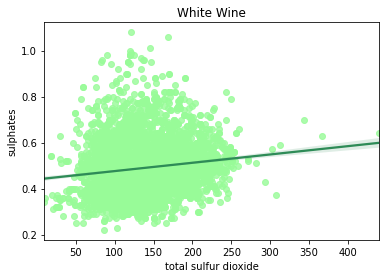

In [565]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

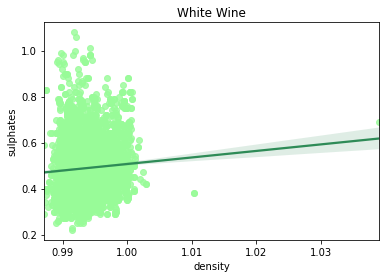

In [566]:
g = sns.regplot(data=data_w, x="density", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

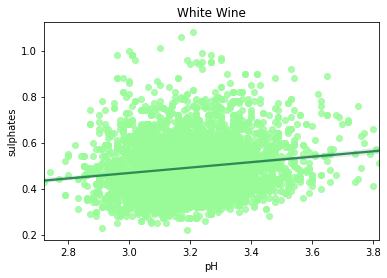

In [567]:
g = sns.regplot(data=data_w, x="pH", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

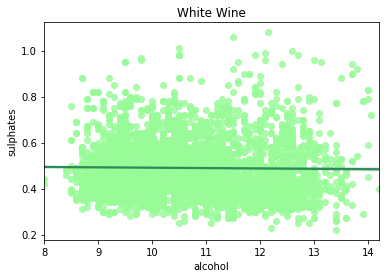

In [568]:
g = sns.regplot(data=data_w, x="alcohol", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Alcohol]

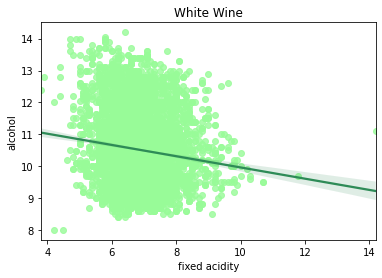

In [569]:
g = sns.regplot(data=data_w, x="fixed acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

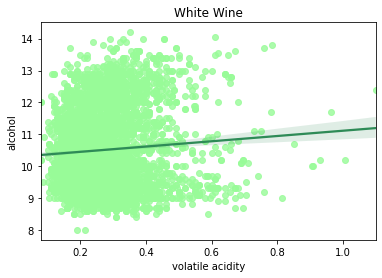

In [570]:
g = sns.regplot(data=data_w, x="volatile acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

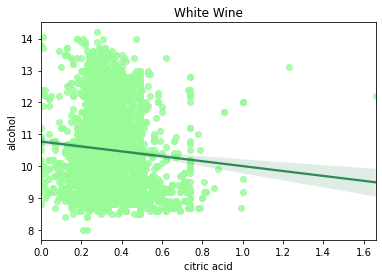

In [571]:
g = sns.regplot(data=data_w, x="citric acid", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

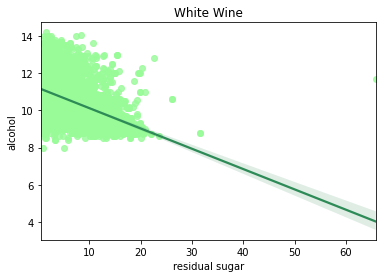

In [572]:
g = sns.regplot(data=data_w, x="residual sugar", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

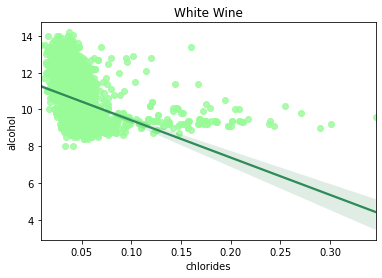

In [573]:
g = sns.regplot(data=data_w, x="chlorides", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

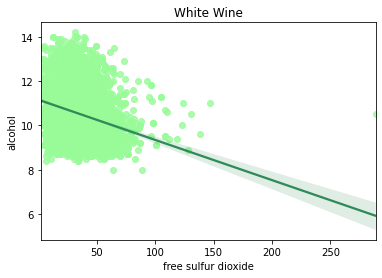

In [574]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

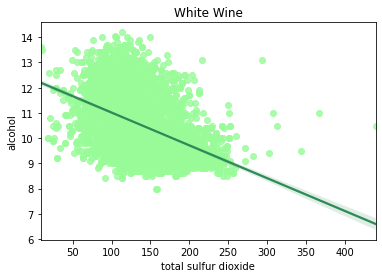

In [575]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

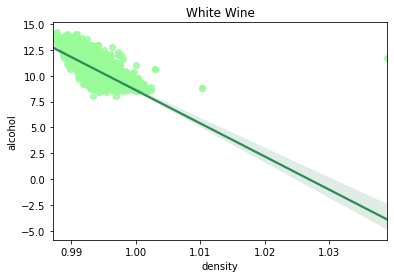

In [576]:
g = sns.regplot(data=data_w, x="density", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

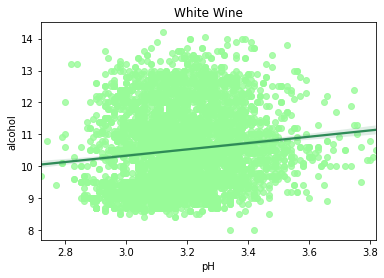

In [577]:
g = sns.regplot(data=data_w, x="pH", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

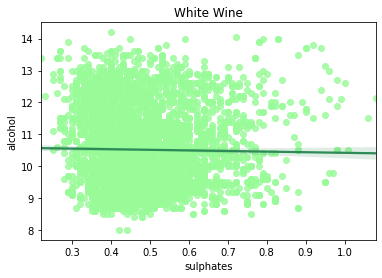

In [578]:
g = sns.regplot(data=data_w, x="sulphates", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

#### Categorical Scatterplots for Quality

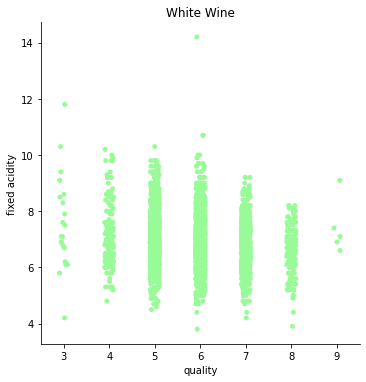

In [579]:
g = sns.catplot(data=data_w, x="quality", y="fixed acidity", color="palegreen").set(title = "White Wine")

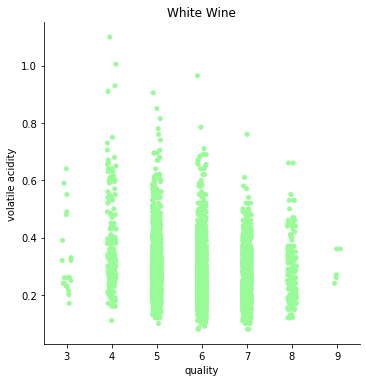

In [580]:
g = sns.catplot(data=data_w, x="quality", y="volatile acidity", color="palegreen").set(title = "White Wine")

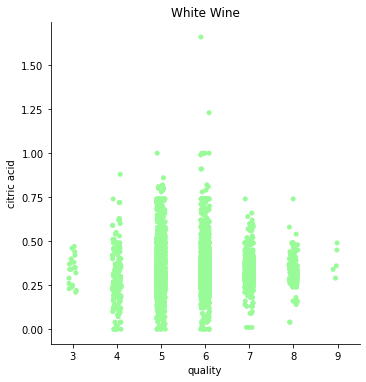

In [581]:
g = sns.catplot(data=data_w, x="quality", y="citric acid", color="palegreen").set(title = "White Wine")

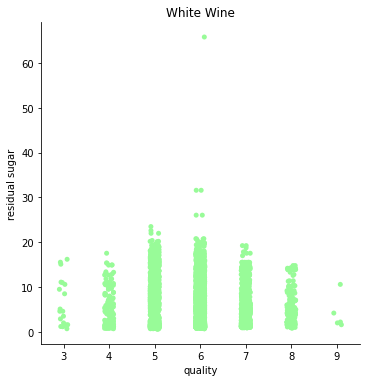

In [582]:
g = sns.catplot(data=data_w, x="quality", y="residual sugar", color="palegreen").set(title = "White Wine")

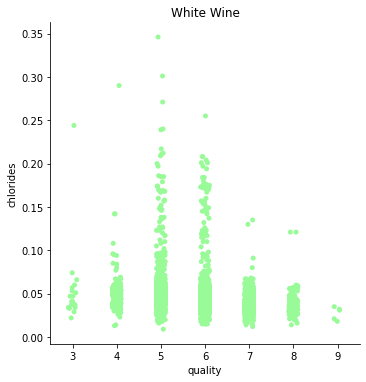

In [583]:
g = sns.catplot(data=data_w, x="quality", y="chlorides", color="palegreen").set(title = "White Wine")

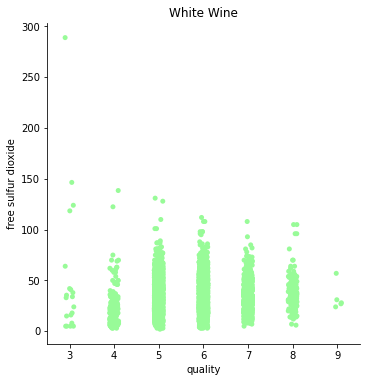

In [584]:
g = sns.catplot(data=data_w, x="quality", y="free sulfur dioxide", color="palegreen").set(title = "White Wine")

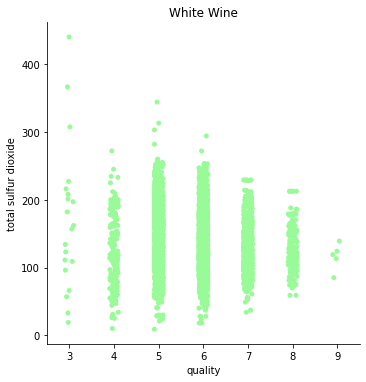

In [585]:
g = sns.catplot(data=data_w, x="quality", y="total sulfur dioxide", color="palegreen").set(title = "White Wine")

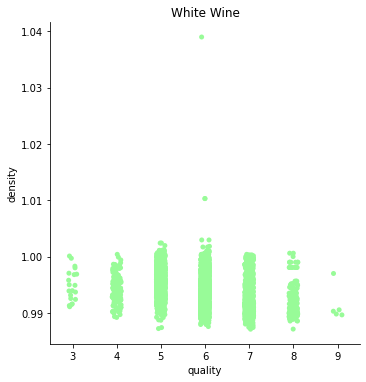

In [586]:
g = sns.catplot(data=data_w, x="quality", y="density", color="palegreen").set(title = "White Wine")

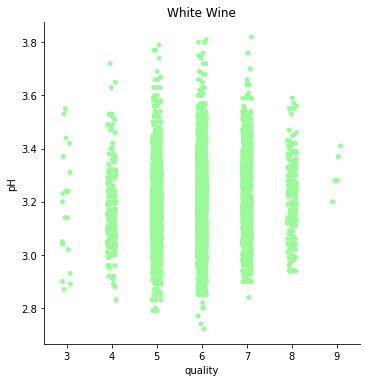

In [587]:
g = sns.catplot(data=data_w, x="quality", y="pH", color="palegreen").set(title = "White Wine")

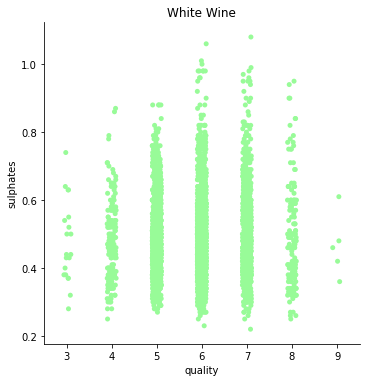

In [588]:
g = sns.catplot(data=data_w, x="quality", y="sulphates", color="palegreen").set(title = "White Wine")

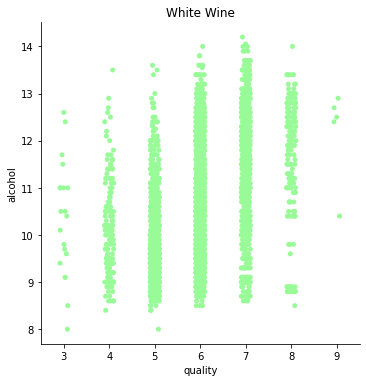

In [589]:
g = sns.catplot(data=data_w, x="quality", y="alcohol", color="palegreen").set(title = "White Wine")

#### Correlation Matrix

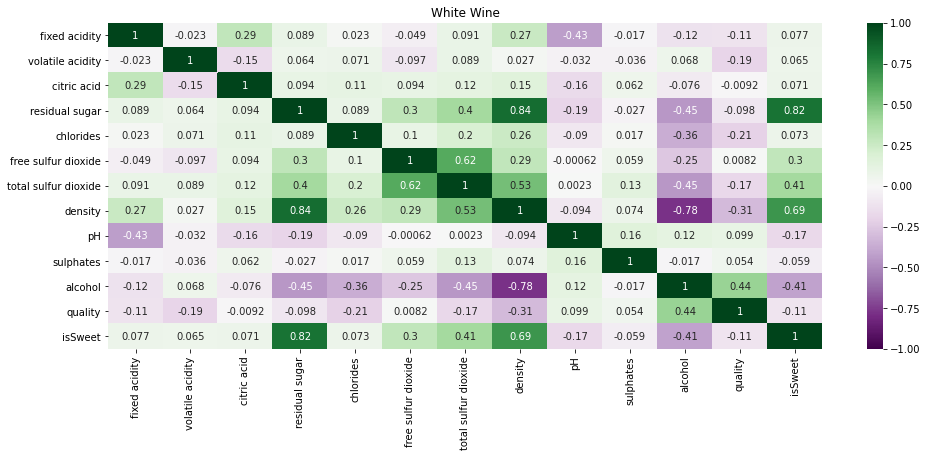

In [590]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_w.corr(), vmin=-1, vmax=1, annot=True, cmap='PRGn').set(title = "White Wine")

### Red Wine

#### Scatter Plots with Regression Lines

##### [Fixed Acidity]

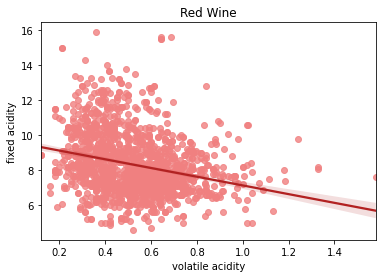

In [591]:
g = sns.regplot(data=data_r, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

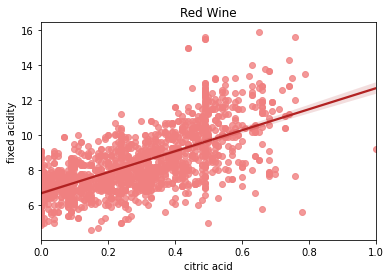

In [592]:
g = sns.regplot(data=data_r, x="citric acid", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

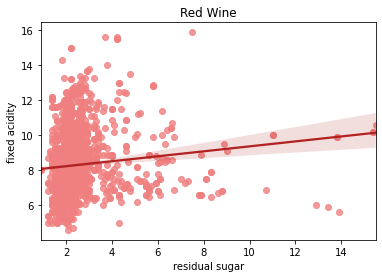

In [593]:
g = sns.regplot(data=data_r, x="residual sugar", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

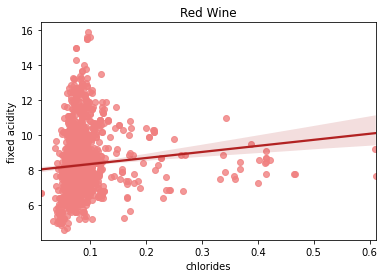

In [594]:
g = sns.regplot(data=data_r, x="chlorides", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

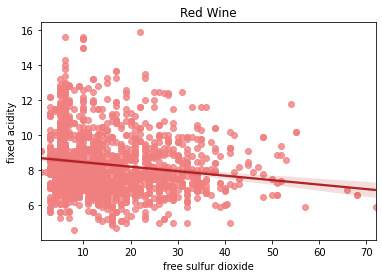

In [595]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

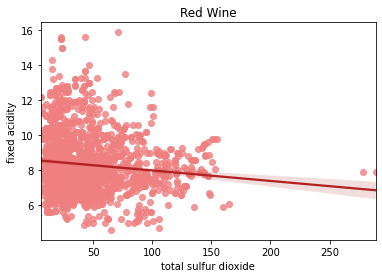

In [596]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

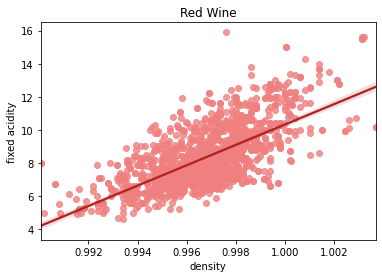

In [597]:
g = sns.regplot(data=data_r, x="density", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

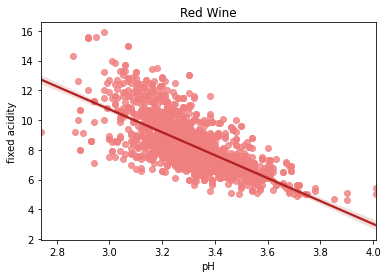

In [598]:
g = sns.regplot(data=data_r, x="pH", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

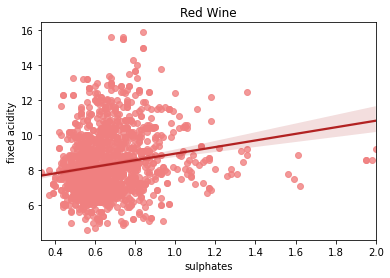

In [599]:
g = sns.regplot(data=data_r, x="sulphates", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

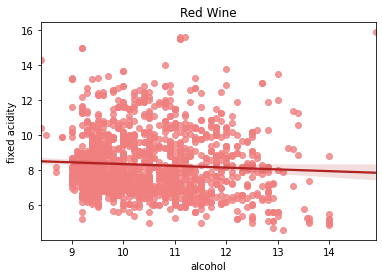

In [600]:
g = sns.regplot(data=data_r, x="alcohol", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Volatile Acidity]

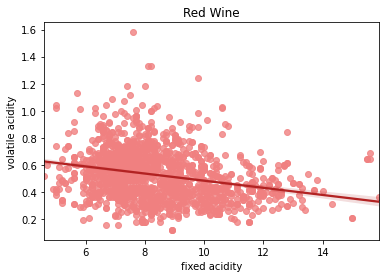

In [601]:
g = sns.regplot(data=data_r, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

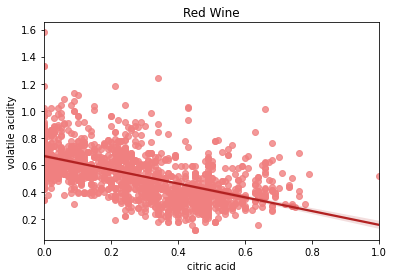

In [602]:
g = sns.regplot(data=data_r, x="citric acid", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

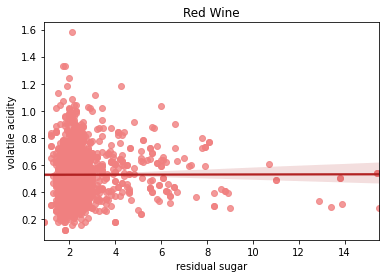

In [603]:
g = sns.regplot(data=data_r, x="residual sugar", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

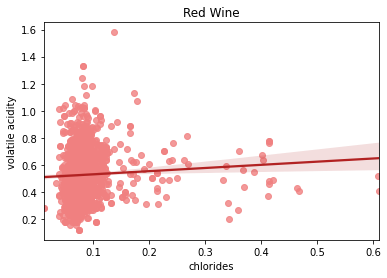

In [604]:
g = sns.regplot(data=data_r, x="chlorides", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

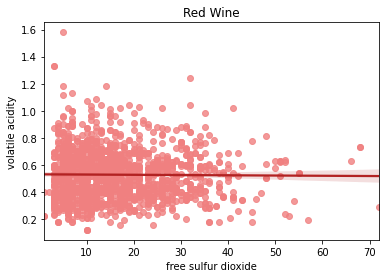

In [605]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

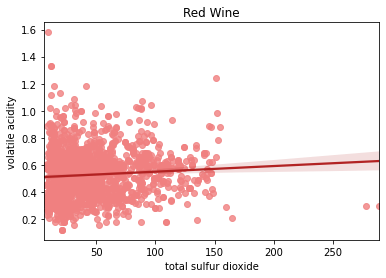

In [606]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

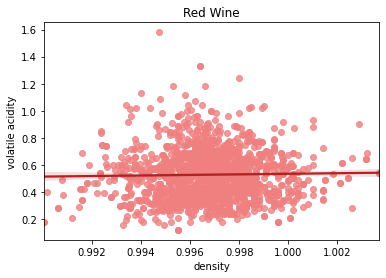

In [607]:
g = sns.regplot(data=data_r, x="density", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

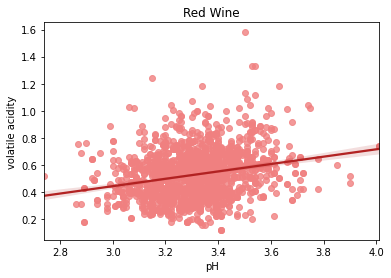

In [608]:
g = sns.regplot(data=data_r, x="pH", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

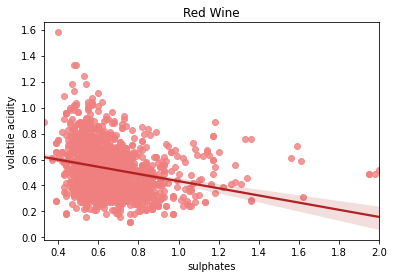

In [609]:
g = sns.regplot(data=data_r, x="sulphates", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

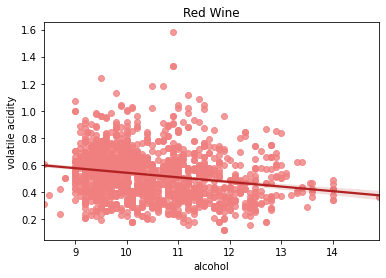

In [610]:
g = sns.regplot(data=data_r, x="alcohol", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Citric Acid]

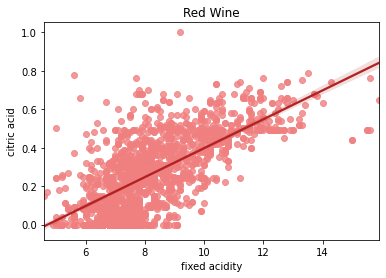

In [611]:
g = sns.regplot(data=data_r, x="fixed acidity", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

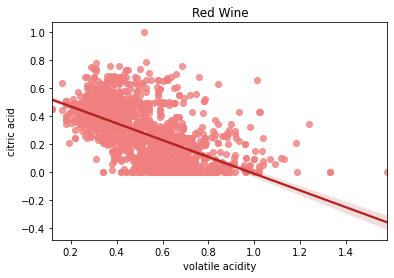

In [612]:
g = sns.regplot(data=data_r, x="volatile acidity", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

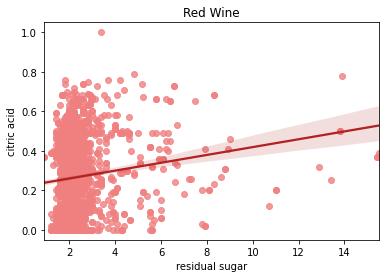

In [613]:
g = sns.regplot(data=data_r, x="residual sugar", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

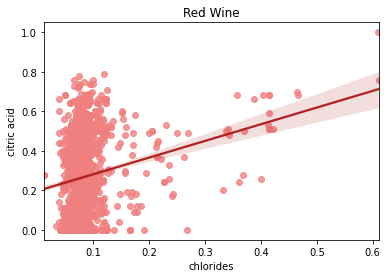

In [614]:
g = sns.regplot(data=data_r, x="chlorides", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

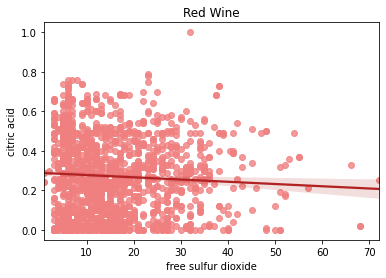

In [615]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

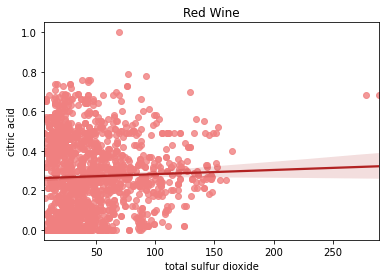

In [616]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

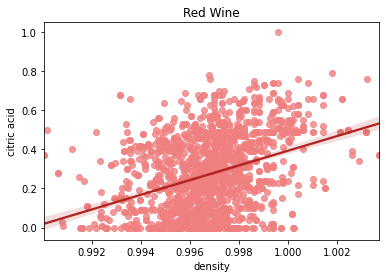

In [617]:
g = sns.regplot(data=data_r, x="density", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

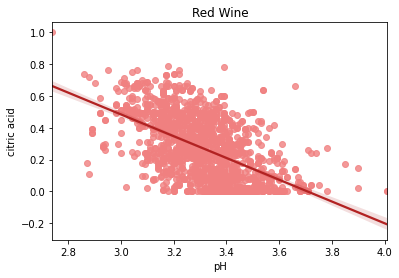

In [618]:
g = sns.regplot(data=data_r, x="pH", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

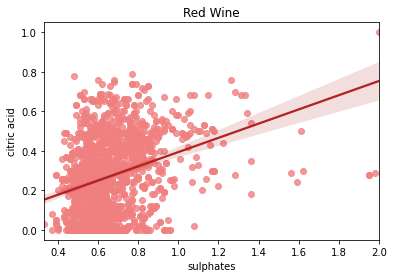

In [619]:
g = sns.regplot(data=data_r, x="sulphates", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

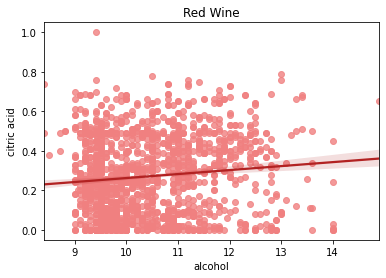

In [620]:
g = sns.regplot(data=data_r, x="alcohol", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Residual Sugar]

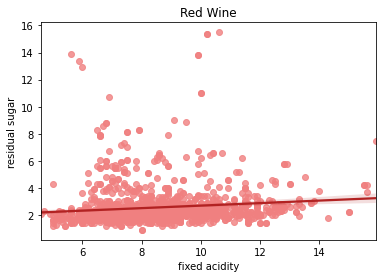

In [621]:
g = sns.regplot(data=data_r, x="fixed acidity", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

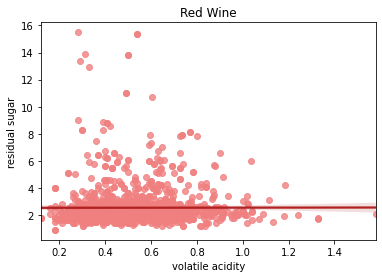

In [622]:
g = sns.regplot(data=data_r, x="volatile acidity", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

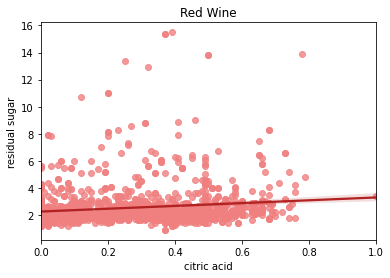

In [623]:
g = sns.regplot(data=data_r, x="citric acid", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

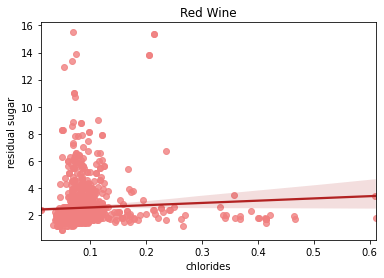

In [624]:
g = sns.regplot(data=data_r, x="chlorides", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

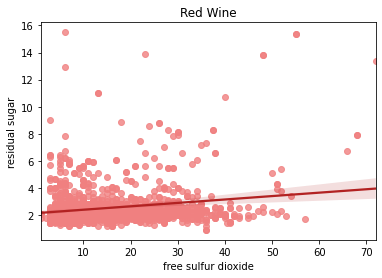

In [625]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

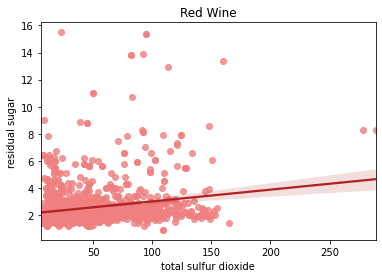

In [626]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

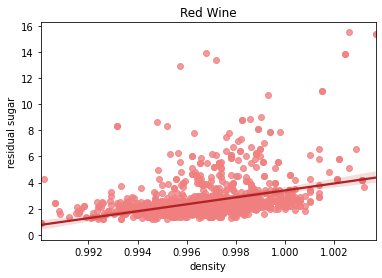

In [627]:
g = sns.regplot(data=data_r, x="density", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

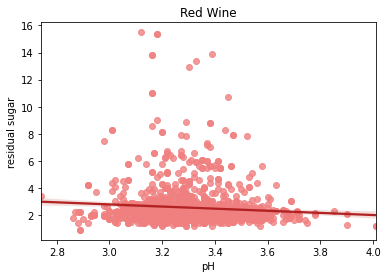

In [628]:
g = sns.regplot(data=data_r, x="pH", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

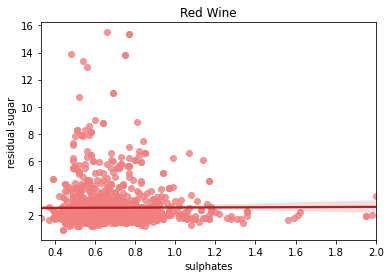

In [629]:
g = sns.regplot(data=data_r, x="sulphates", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

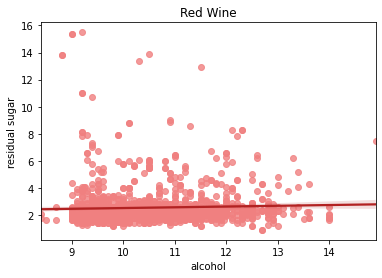

In [630]:
g = sns.regplot(data=data_r, x="alcohol", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Chlorides]

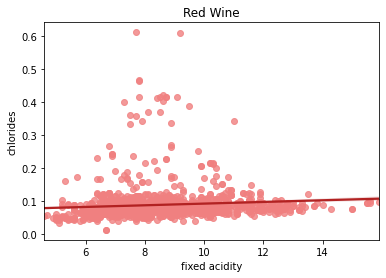

In [631]:
g = sns.regplot(data=data_r, x="fixed acidity", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

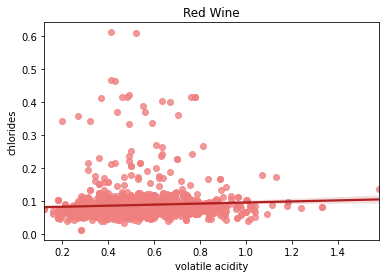

In [632]:
g = sns.regplot(data=data_r, x="volatile acidity", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

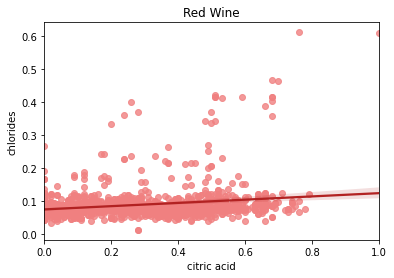

In [633]:
g = sns.regplot(data=data_r, x="citric acid", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

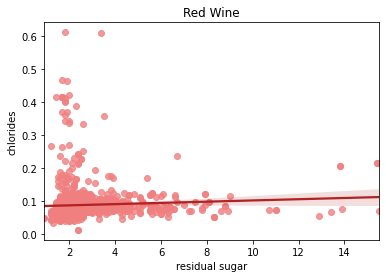

In [634]:
g = sns.regplot(data=data_r, x="residual sugar", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

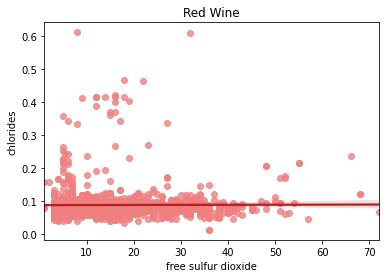

In [635]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

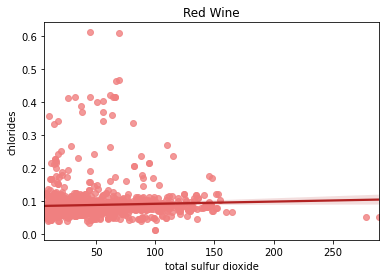

In [636]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

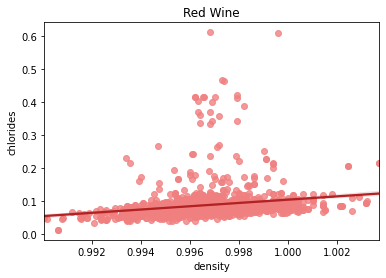

In [637]:
g = sns.regplot(data=data_r, x="density", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

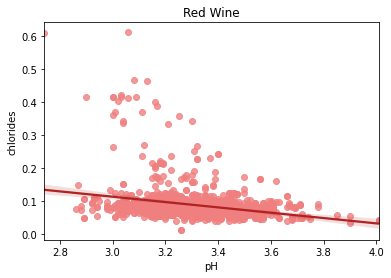

In [638]:
g = sns.regplot(data=data_r, x="pH", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

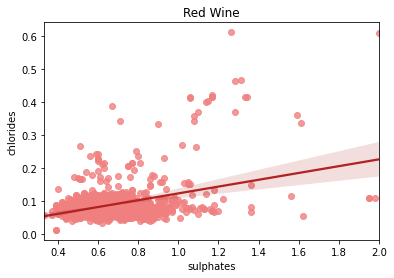

In [639]:
g = sns.regplot(data=data_r, x="sulphates", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

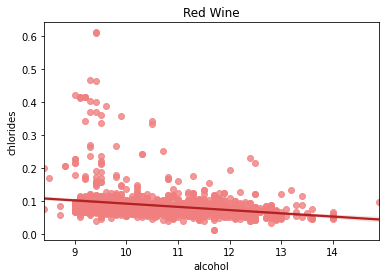

In [640]:
g = sns.regplot(data=data_r, x="alcohol", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Free Sulfur Dioxide]

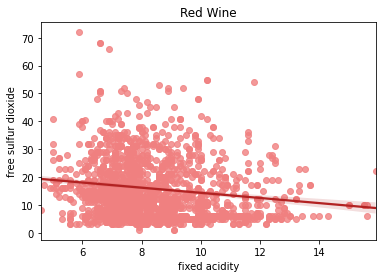

In [641]:
g = sns.regplot(data=data_r, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

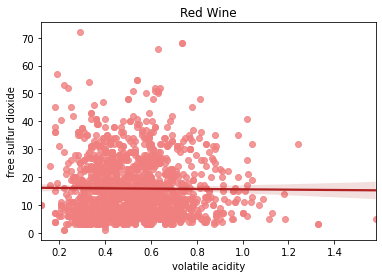

In [642]:
g = sns.regplot(data=data_r, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

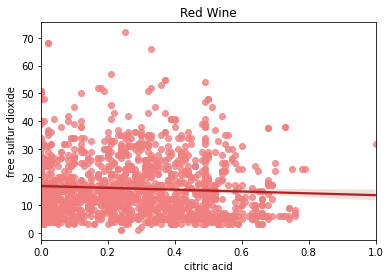

In [643]:
g = sns.regplot(data=data_r, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

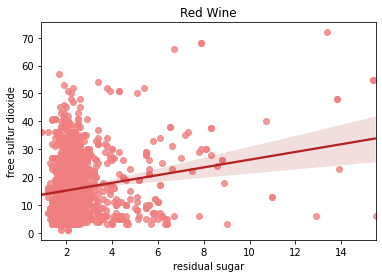

In [644]:
g = sns.regplot(data=data_r, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

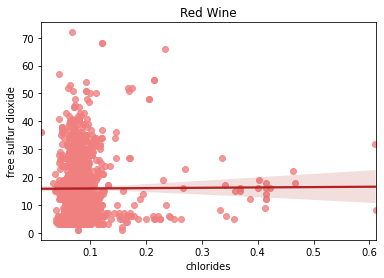

In [645]:
g = sns.regplot(data=data_r, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

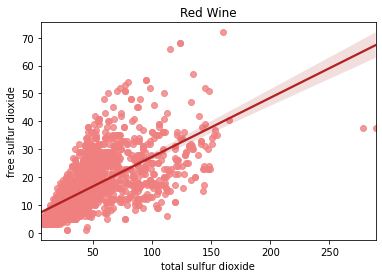

In [646]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

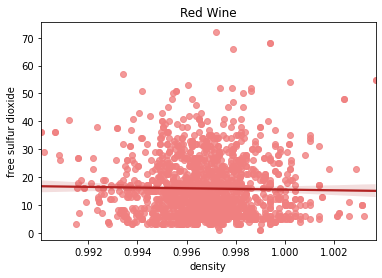

In [647]:
g = sns.regplot(data=data_r, x="density", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

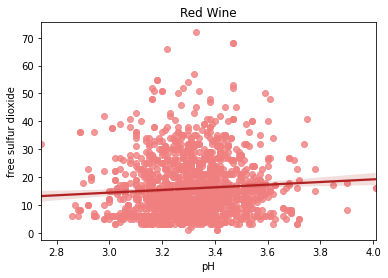

In [648]:
g = sns.regplot(data=data_r, x="pH", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

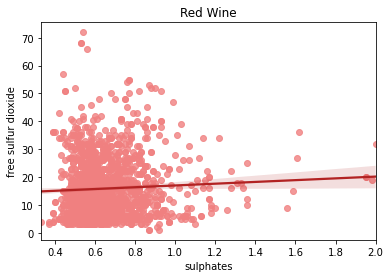

In [649]:
g = sns.regplot(data=data_r, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

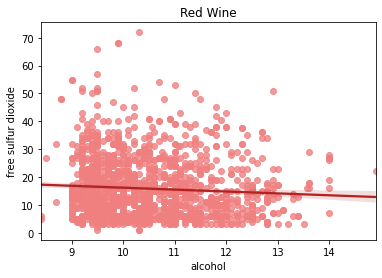

In [650]:
g = sns.regplot(data=data_r, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Total Sulfur Dioxide]

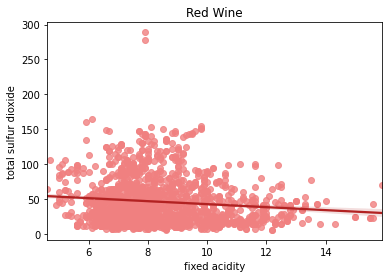

In [651]:
g = sns.regplot(data=data_r, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

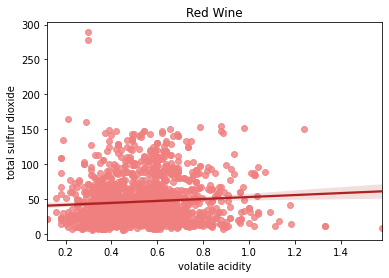

In [652]:
g = sns.regplot(data=data_r, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

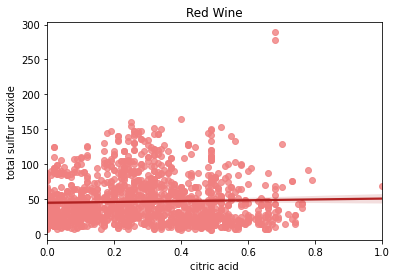

In [653]:
g = sns.regplot(data=data_r, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

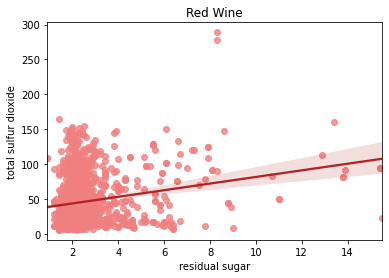

In [654]:
g = sns.regplot(data=data_r, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

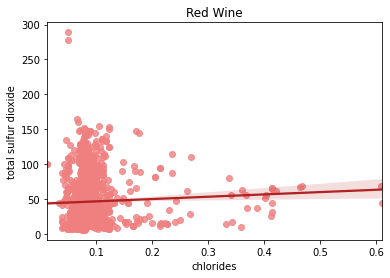

In [655]:
g = sns.regplot(data=data_r, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

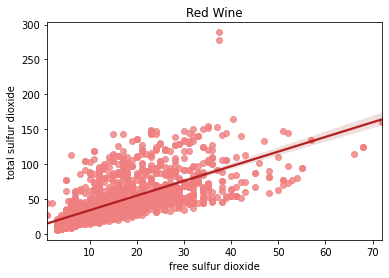

In [656]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

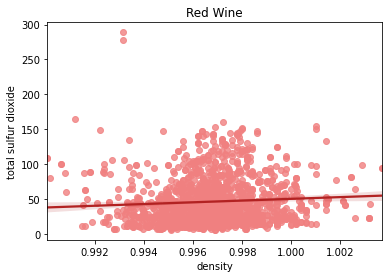

In [657]:
g = sns.regplot(data=data_r, x="density", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

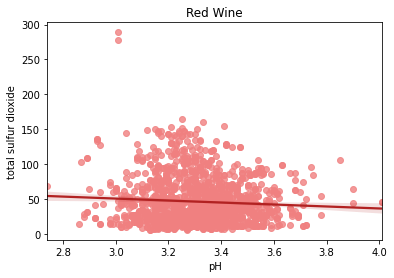

In [658]:
g = sns.regplot(data=data_r, x="pH", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

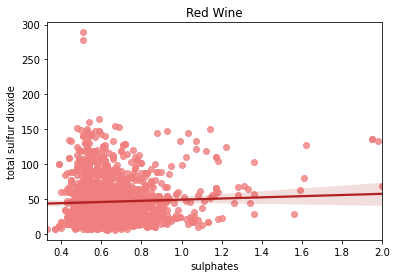

In [659]:
g = sns.regplot(data=data_r, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

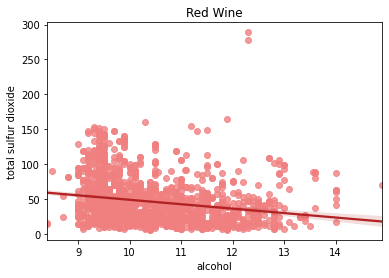

In [660]:
g = sns.regplot(data=data_r, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Density]

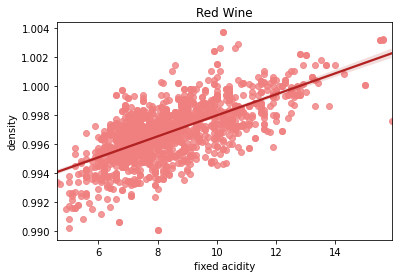

In [661]:
g = sns.regplot(data=data_r, x="fixed acidity", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

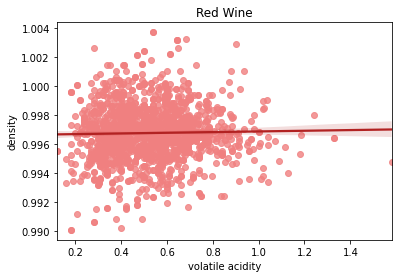

In [662]:
g = sns.regplot(data=data_r, x="volatile acidity", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

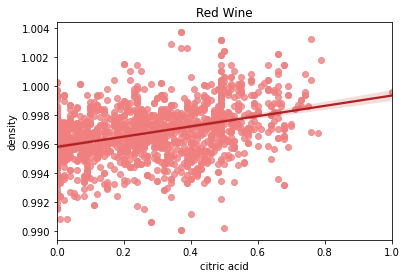

In [663]:
g = sns.regplot(data=data_r, x="citric acid", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

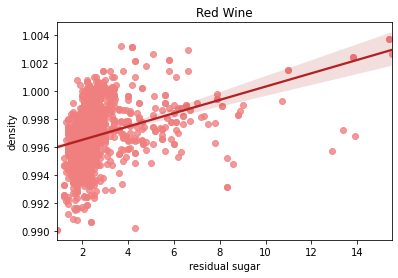

In [664]:
g = sns.regplot(data=data_r, x="residual sugar", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

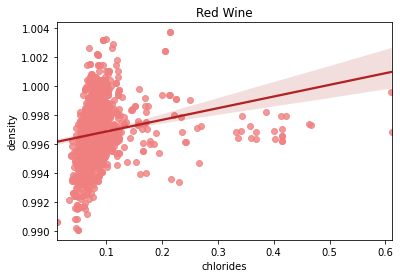

In [665]:
g = sns.regplot(data=data_r, x="chlorides", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

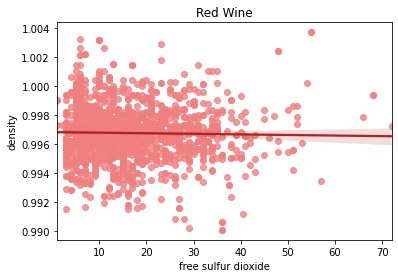

In [666]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

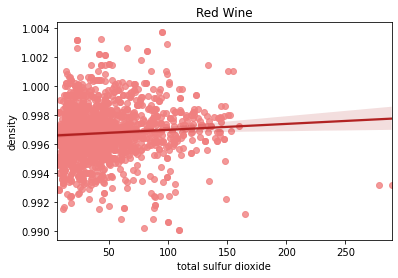

In [667]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

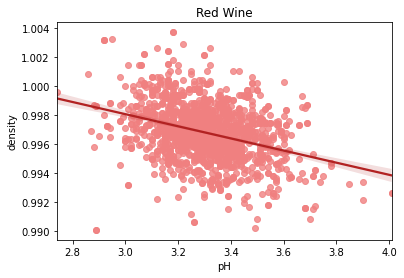

In [668]:
g = sns.regplot(data=data_r, x="pH", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

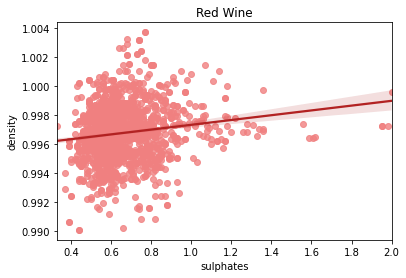

In [669]:
g = sns.regplot(data=data_r, x="sulphates", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

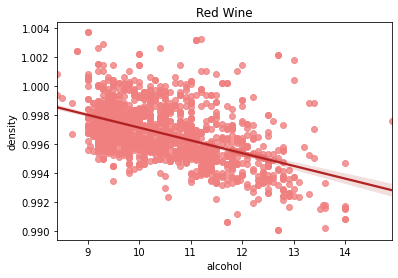

In [670]:
g = sns.regplot(data=data_r, x="alcohol", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [pH]

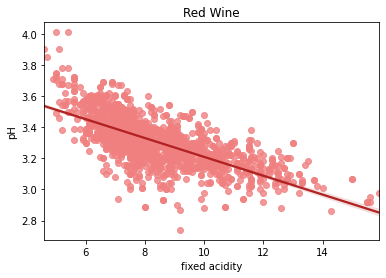

In [671]:
g = sns.regplot(data=data_r, x="fixed acidity", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

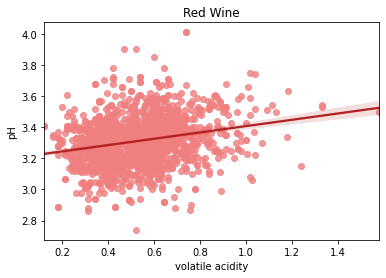

In [672]:
g = sns.regplot(data=data_r, x="volatile acidity", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

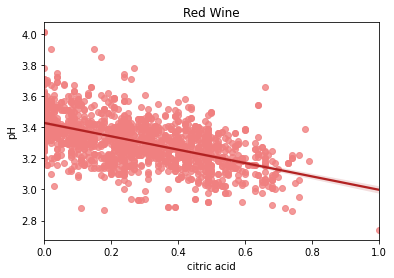

In [673]:
g = sns.regplot(data=data_r, x="citric acid", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

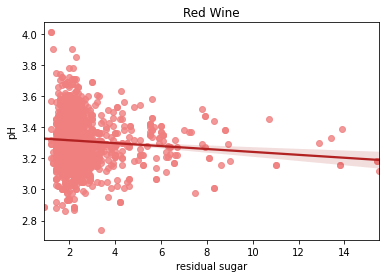

In [674]:
g = sns.regplot(data=data_r, x="residual sugar", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

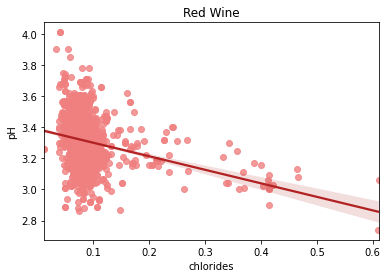

In [675]:
g = sns.regplot(data=data_r, x="chlorides", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

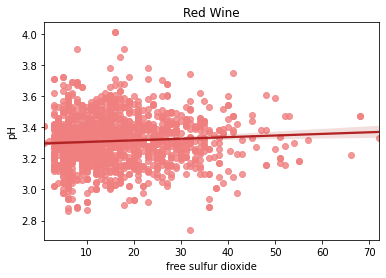

In [676]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

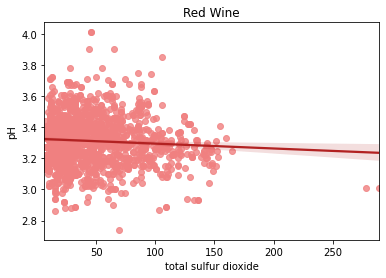

In [677]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

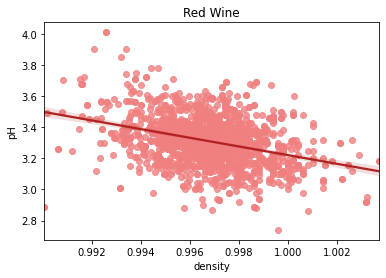

In [678]:
g = sns.regplot(data=data_r, x="density", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

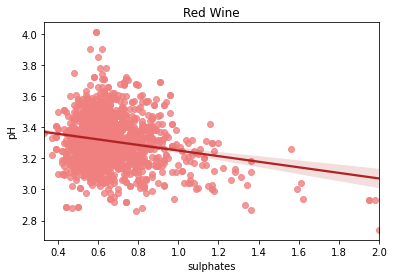

In [679]:
g = sns.regplot(data=data_r, x="sulphates", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

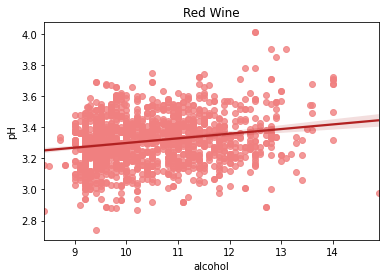

In [680]:
g = sns.regplot(data=data_r, x="alcohol", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Sulphates]

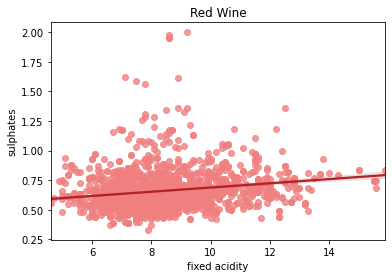

In [681]:
g = sns.regplot(data=data_r, x="fixed acidity", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

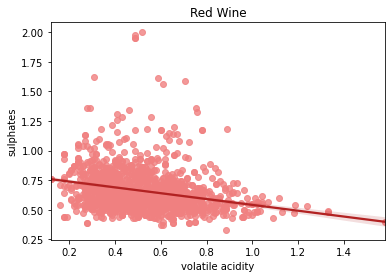

In [682]:
g = sns.regplot(data=data_r, x="volatile acidity", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

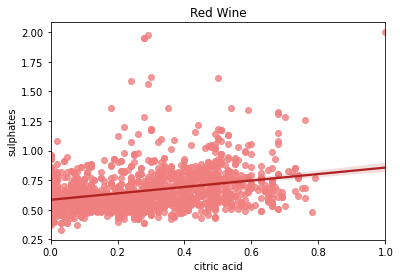

In [683]:
g = sns.regplot(data=data_r, x="citric acid", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

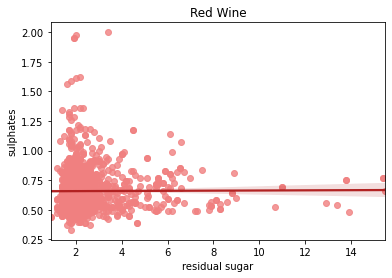

In [684]:
g = sns.regplot(data=data_r, x="residual sugar", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

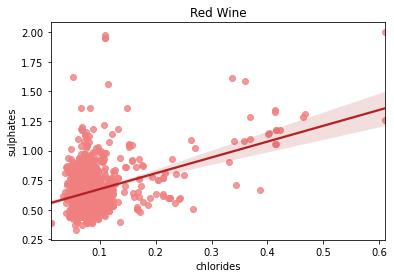

In [685]:
g = sns.regplot(data=data_r, x="chlorides", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

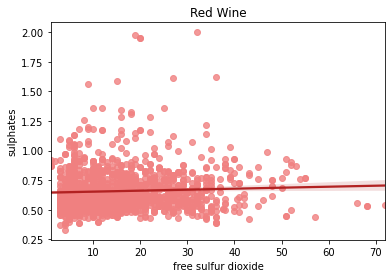

In [686]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

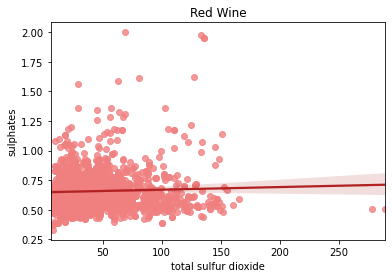

In [687]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

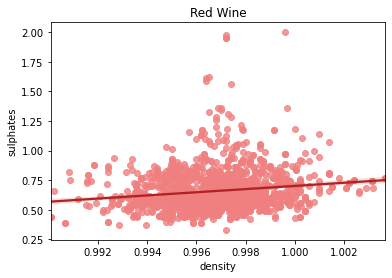

In [688]:
g = sns.regplot(data=data_r, x="density", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

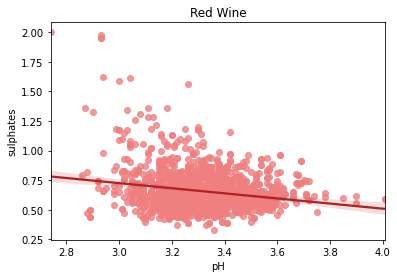

In [689]:
g = sns.regplot(data=data_r, x="pH", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

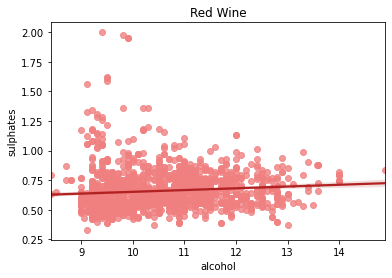

In [690]:
g = sns.regplot(data=data_r, x="alcohol", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Alcohol]

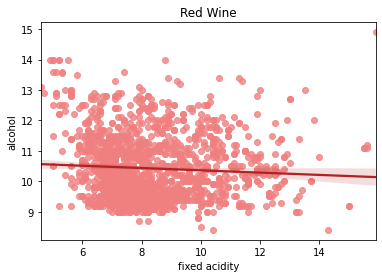

In [691]:
g = sns.regplot(data=data_r, x="fixed acidity", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

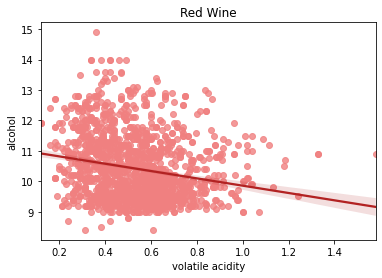

In [692]:
g = sns.regplot(data=data_r, x="volatile acidity", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

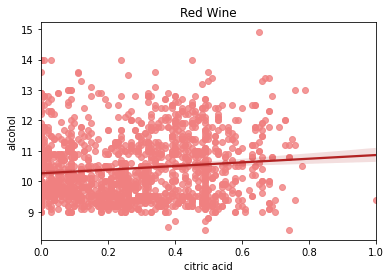

In [693]:
g = sns.regplot(data=data_r, x="citric acid", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

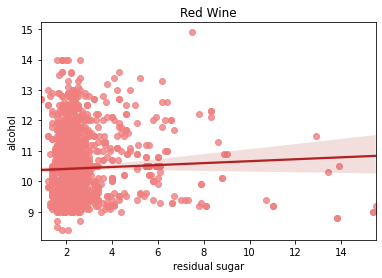

In [694]:
g = sns.regplot(data=data_r, x="residual sugar", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

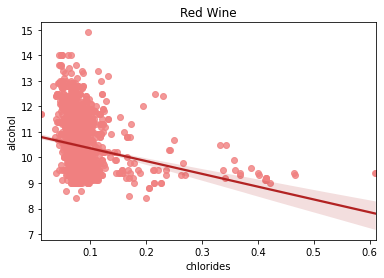

In [695]:
g = sns.regplot(data=data_r, x="chlorides", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

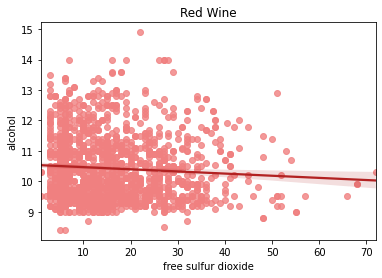

In [696]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

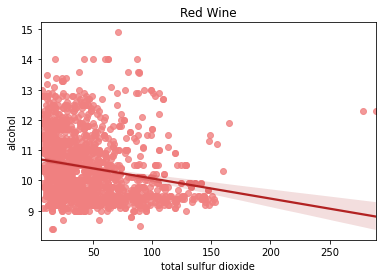

In [697]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

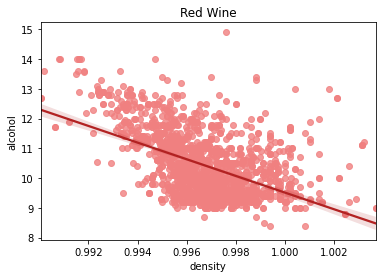

In [698]:
g = sns.regplot(data=data_r, x="density", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

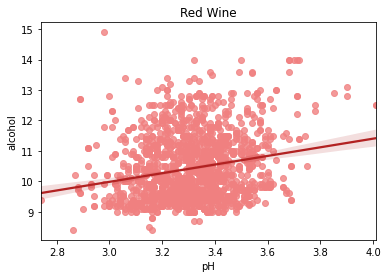

In [699]:
g = sns.regplot(data=data_r, x="pH", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

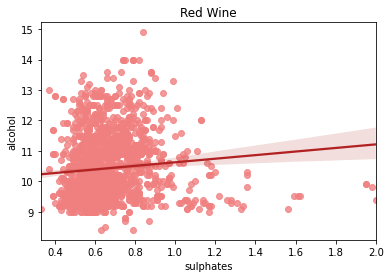

In [700]:
g = sns.regplot(data=data_r, x="sulphates", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

#### Categorical Scatterplots for Quality

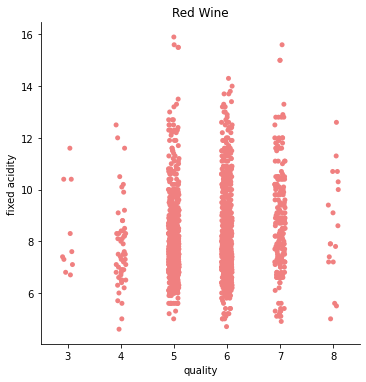

In [701]:
g = sns.catplot(data=data_r, x="quality", y="fixed acidity", color="lightcoral").set(title = "Red Wine")

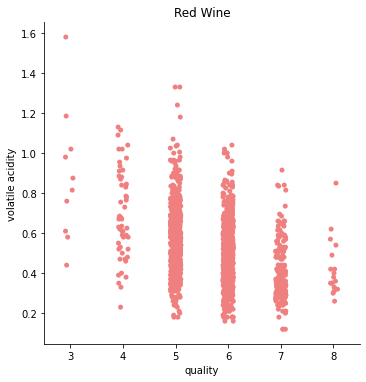

In [702]:
g = sns.catplot(data=data_r, x="quality", y="volatile acidity", color="lightcoral").set(title = "Red Wine")

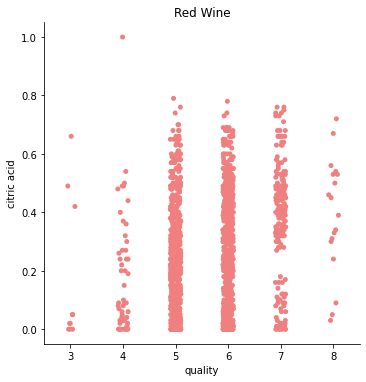

In [703]:
g = sns.catplot(data=data_r, x="quality", y="citric acid", color="lightcoral").set(title = "Red Wine")

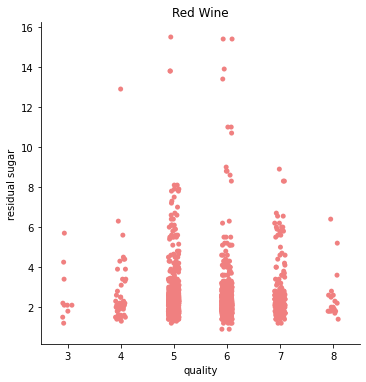

In [704]:
g = sns.catplot(data=data_r, x="quality", y="residual sugar", color="lightcoral").set(title = "Red Wine")

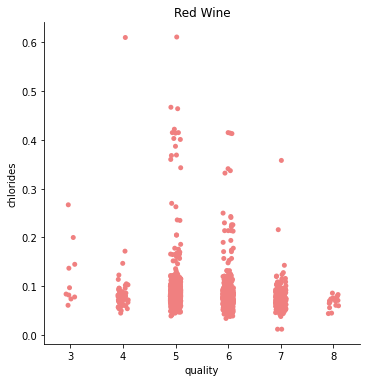

In [705]:
g = sns.catplot(data=data_r, x="quality", y="chlorides", color="lightcoral").set(title = "Red Wine")

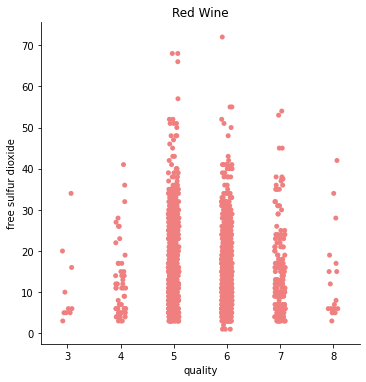

In [706]:
g = sns.catplot(data=data_r, x="quality", y="free sulfur dioxide", color="lightcoral").set(title = "Red Wine")

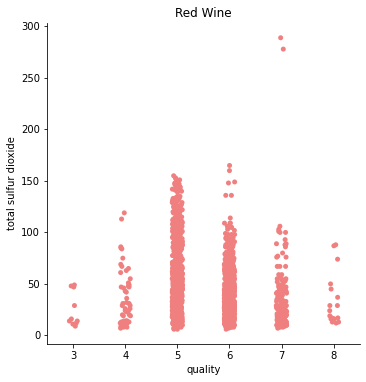

In [707]:
g = sns.catplot(data=data_r, x="quality", y="total sulfur dioxide", color="lightcoral").set(title = "Red Wine")

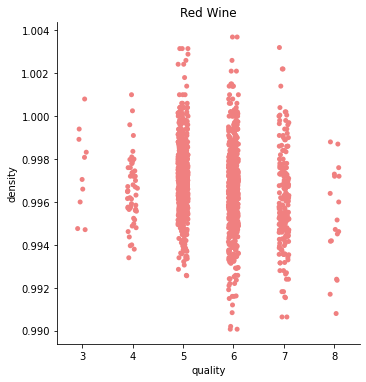

In [708]:
g = sns.catplot(data=data_r, x="quality", y="density", color="lightcoral").set(title = "Red Wine")

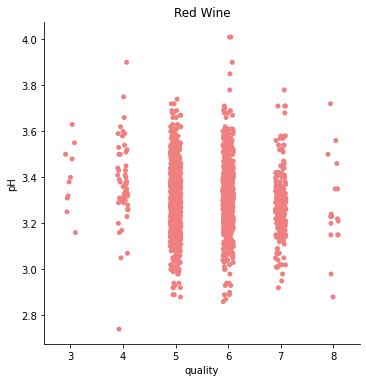

In [709]:
g = sns.catplot(data=data_r, x="quality", y="pH", color="lightcoral").set(title = "Red Wine")

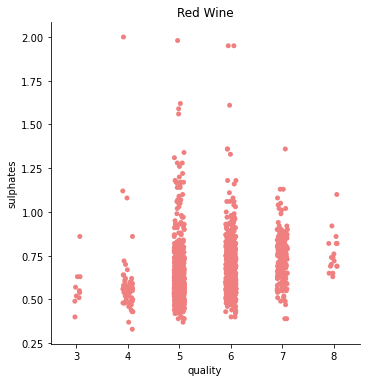

In [710]:
g = sns.catplot(data=data_r, x="quality", y="sulphates", color="lightcoral").set(title = "Red Wine")

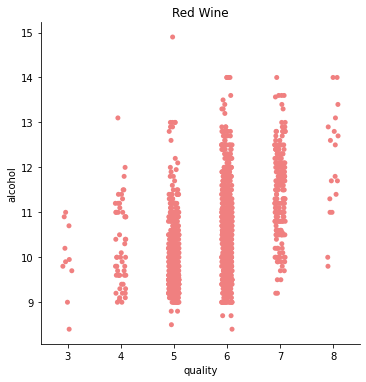

In [711]:
g = sns.catplot(data=data_r, x="quality", y="alcohol", color="lightcoral").set(title = "Red Wine")

#### Correlation Matrix

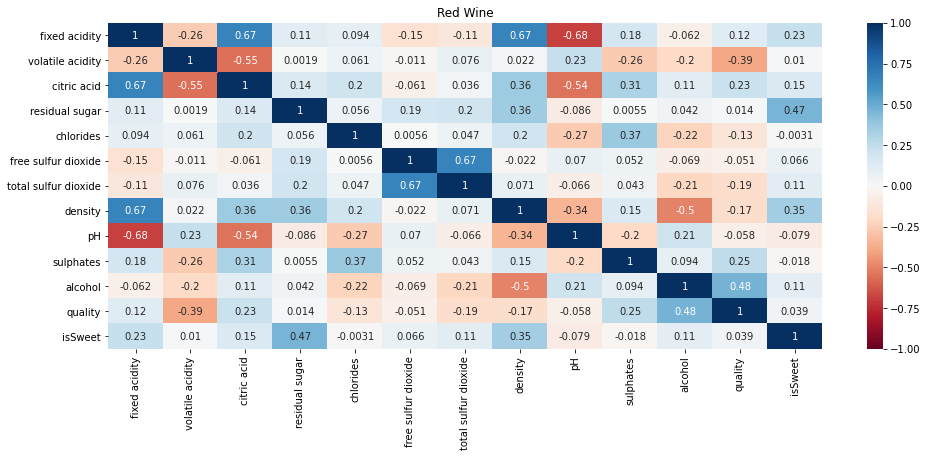

In [716]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_r.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu').set(title = "Red Wine")

## Modelling

### White Wine

#### One-Hot Encoding

In [319]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  quality  alcohol_cat  isSweet
0            7.0              0.27         0.36  ...        6            L        1
1            6.3              0.30         0.34  ...        6            M        0
2            8.1              0.28         0.40  ...        6            M        1
3            7.2              0.23         0.32  ...        6            M        1
4            7.2              0.23         0.32  ...        6            M        1

[5 rows x 14 columns]

In [320]:
dummies = []
dummies.append(pd.get_dummies(data_w["alcohol_cat"]))
df_dummies = pd.concat(dummies, axis=1)
data_w = pd.concat((data_w, df_dummies), axis=1)
data_w = data_w.drop(["alcohol_cat"], axis=1)

In [321]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

#### Classification Modelling

##### Pre-Processing

In [323]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

Converting Quality into a binary variable

In [322]:
data_bin_w = data_w.rename(columns={"quality":"quality_cat"})
for index, series in data_bin_w.iterrows():
    quality = series["quality_cat"]
    if quality < 6:
        data_bin_w.loc[index, "quality_cat"] = 0
    else:
        data_bin_w.loc[index, "quality_cat"] = 1

In [324]:
data_bin_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

Quality is unbalanced

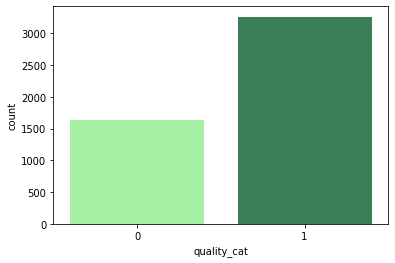

In [325]:
g = sns.countplot(x="quality_cat", data=data_bin_w, palette={0:"palegreen",1:"seagreen"})

In [326]:
X = data_bin_w.drop(["quality_cat"], axis=1).values
Q = data_bin_w["quality_cat"].values

Split 20% for test set and apply SMOTE to balance training set

In [327]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

XTrain, QTrain = SMOTE().fit_resample(XTrain, QTrain)
print(Counter(QTrain))

Counter({1: 2589, 0: 2589})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Scale data

In [328]:
scaler = StandardScaler()
XTrain, XTest = (scaler.fit_transform(d) for d in (XTrain, XTest))

##### Logistic Regression

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2589
           1       0.76      0.69      0.72      2589

    accuracy                           0.73      5178
   macro avg       0.74      0.73      0.73      5178
weighted avg       0.74      0.73      0.73      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.50      0.84      0.63       311
           1       0.89      0.62      0.73       669

    accuracy                           0.69       980
   macro avg       0.70      0.73      0.68       980
weighted avg       0.77      0.69      0.70       980

Cross-validation scores: 0.73 (± 0.01)


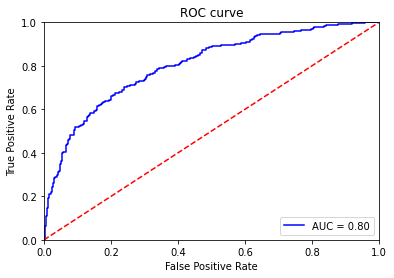

In [329]:
clf = LogisticRegression(penalty='l2', C=1, solver='lbfgs',multi_class='auto')
clf.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

Hyper-Parameter Tuning

In [330]:
tuned_parameters = [{'C': [1, 10, 100]}]

clf = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto'), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 1}

Grid scores on development set:

0.734 (± 0.021) for {'C': 1}

0.733 (± 0.021) for {'C': 10}

0.733 (± 0.021) for {'C': 100}



##### SVC

###### Linear

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2589
           1       0.77      0.67      0.72      2589

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.73      5178
weighted avg       0.74      0.74      0.73      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.49      0.84      0.62       311
           1       0.89      0.59      0.71       669

    accuracy                           0.67       980
   macro avg       0.69      0.72      0.67       980
weighted avg       0.76      0.67      0.68       980

Cross-validation scores: 0.73 (± 0.01)


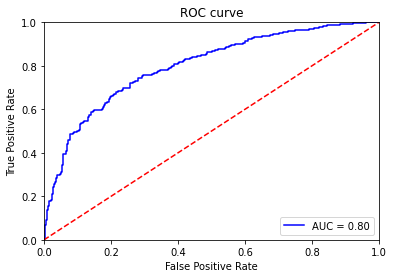

In [331]:
svm = SVC(kernel='linear')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Poly

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2589
           1       0.82      0.75      0.78      2589

    accuracy                           0.79      5178
   macro avg       0.80      0.79      0.79      5178
weighted avg       0.80      0.79      0.79      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.53      0.81      0.64       311
           1       0.88      0.66      0.76       669

    accuracy                           0.71       980
   macro avg       0.70      0.74      0.70       980
weighted avg       0.77      0.71      0.72       980

Cross-validation scores: 0.76 (± 0.04)


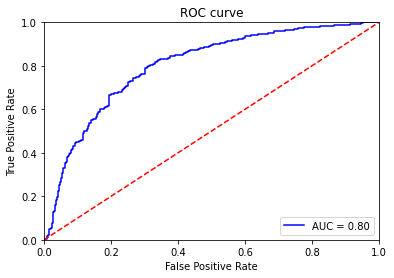

In [332]:
svm = SVC(kernel='poly')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### RBF

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2589
           1       0.83      0.79      0.81      2589

    accuracy                           0.82      5178
   macro avg       0.82      0.82      0.82      5178
weighted avg       0.82      0.82      0.82      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       311
           1       0.87      0.73      0.79       669

    accuracy                           0.74       980
   macro avg       0.72      0.75      0.72       980
weighted avg       0.77      0.74      0.75       980

Cross-validation scores: 0.78 (± 0.04)


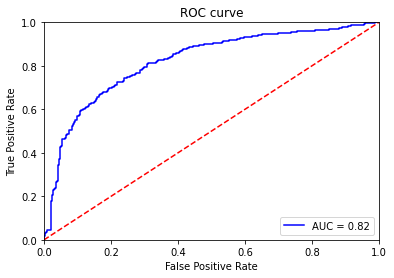

In [333]:
svm = SVC(kernel='rbf')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Hyper-Parameter Tuning

In [334]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.790 (± 0.050) for {'C': 1, 'kernel': 'rbf'}

0.813 (± 0.062) for {'C': 10, 'kernel': 'rbf'}

0.827 (± 0.069) for {'C': 100, 'kernel': 'rbf'}

0.770 (± 0.053) for {'C': 1, 'kernel': 'poly'}

0.792 (± 0.047) for {'C': 10, 'kernel': 'poly'}

0.798 (± 0.062) for {'C': 100, 'kernel': 'poly'}

0.734 (± 0.014) for {'C': 1, 'kernel': 'linear'}

0.735 (± 0.015) for {'C': 10, 'kernel': 'linear'}

0.734 (± 0.016) for {'C': 100, 'kernel': 'linear'}



##### Decision Tree

Train Set Predictions Report

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2589
           1       0.90      0.87      0.89      2589

    accuracy                           0.89      5178
   macro avg       0.89      0.89      0.89      5178
weighted avg       0.89      0.89      0.89      5178

Test Set Predictions Report

              precision    recall  f1-score   support

           0       0.33      0.82      0.47       311
           1       0.73      0.23      0.35       669

    accuracy                           0.42       980
   macro avg       0.53      0.53      0.41       980
weighted avg       0.61      0.42      0.39       980

Cross-validation scores: 0.76 (± 0.02)


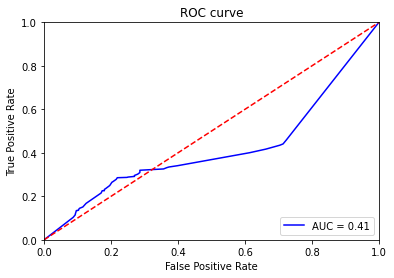

In [335]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

##### Random Forest

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2589
           1       1.00      1.00      1.00      2589

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.33      0.99      0.50       311
           1       0.95      0.08      0.14       669

    accuracy                           0.37       980
   macro avg       0.64      0.53      0.32       980
weighted avg       0.75      0.37      0.26       980

Cross-validation scores: 0.85 (± 0.05)


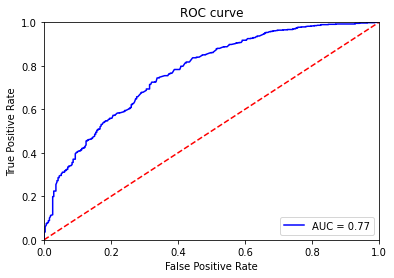

In [336]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=10)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [337]:
tuned_parameters = [{'n_estimators': [10,50,100,200],
                     'max_depth': [5,10,20,50]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 100}

Grid scores on development set:

0.774 (± 0.056) for {'max_depth': 5, 'n_estimators': 10}

0.783 (± 0.065) for {'max_depth': 5, 'n_estimators': 50}

0.784 (± 0.051) for {'max_depth': 5, 'n_estimators': 100}

0.786 (± 0.059) for {'max_depth': 5, 'n_estimators': 200}

0.821 (± 0.055) for {'max_depth': 10, 'n_estimators': 10}

0.833 (± 0.067) for {'max_depth': 10, 'n_estimators': 50}

0.833 (± 0.064) for {'max_depth': 10, 'n_estimators': 100}

0.834 (± 0.061) for {'max_depth': 10, 'n_estimators': 200}

0.840 (± 0.053) for {'max_depth': 20, 'n_estimators': 10}

0.861 (± 0.070) for {'max_depth': 20, 'n_estimators': 50}

0.865 (± 0.071) for {'max_depth': 20, 'n_estimators': 100}

0.865 (± 0.074) for {'max_depth': 20, 'n_estimators': 200}

0.842 (± 0.048) for {'max_depth': 50, 'n_estimators': 10}

0.861 (± 0.074) for {'max_depth': 50, 'n_estimators': 50}

0.863 (± 0.062) for {'max_depth': 50, 'n_estimators'

##### KNN

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2589
           1       0.90      0.84      0.87      2589

    accuracy                           0.87      5178
   macro avg       0.88      0.87      0.87      5178
weighted avg       0.88      0.87      0.87      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       311
           1       0.87      0.73      0.79       669

    accuracy                           0.74       980
   macro avg       0.72      0.74      0.72       980
weighted avg       0.77      0.74      0.75       980

Cross-validation scores: 0.79 (± 0.01)


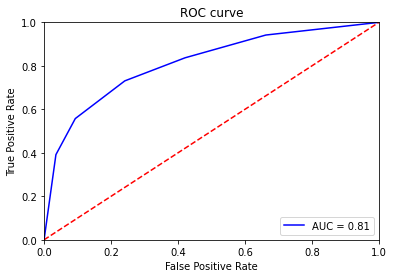

In [338]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [339]:
tuned_parameters = [{'n_neighbors': [5, 10, 25, 50]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on development set:

0.797 (± 0.031) for {'n_neighbors': 5}

0.775 (± 0.031) for {'n_neighbors': 10}

0.767 (± 0.031) for {'n_neighbors': 25}

0.754 (± 0.031) for {'n_neighbors': 50}

